In [1]:
%matplotlib inline

import os 
import sys 
import time
import hashlib

from datetime  import datetime 

import numpy as np  # learn 
import pandas as pd # learn
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *

 
import matplotlib as mplt # learn matplolib 
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# import seaborn as sns 
# sns.set_style("whitegrid")
# sns.set(rc={"figure.figsize": (14, 6)})

import IPython
from IPython.display import display


import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
 
# import sklearn as sk
import itertools


# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SQLContext
# from pyspark.sql.types import *

# from pyspark.mllib.regression import LabeledPoint


from keras.models import Sequential 
from keras.layers.core import Dense, Activation, TimeDistributedDense, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import *
# RMSprop, Adadelta
from keras.regularizers import l2, activity_l2



import scipy.stats as st


# http://sebastianruder.com/optimizing-gradient-descent/

Using Theano backend.


size of noisy data: (14364, 3)
size of noisy data: (14387, 3)
size of noisy data: (14361, 3)
size of noisy data: (14323, 3)
size of noisy data: (14423, 3)
size of noisy data: (13675, 3)
size of noisy data: (9333, 3)


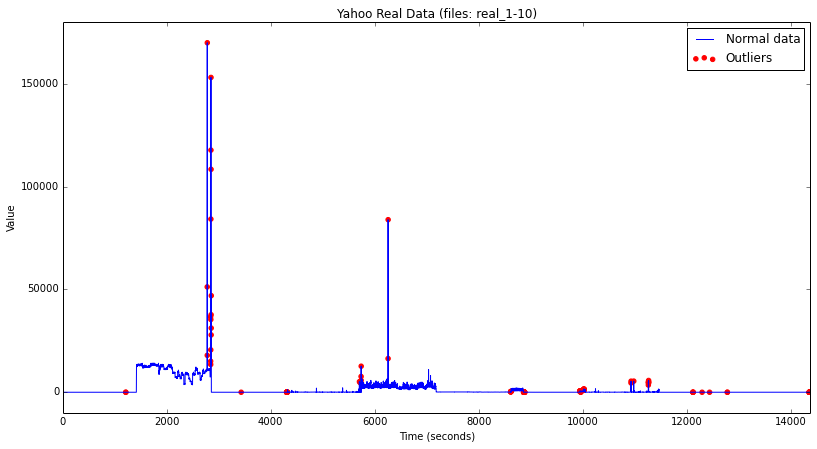

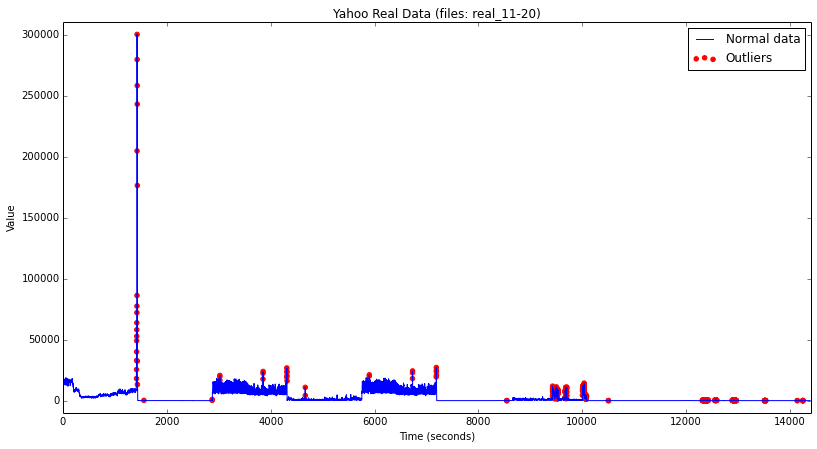

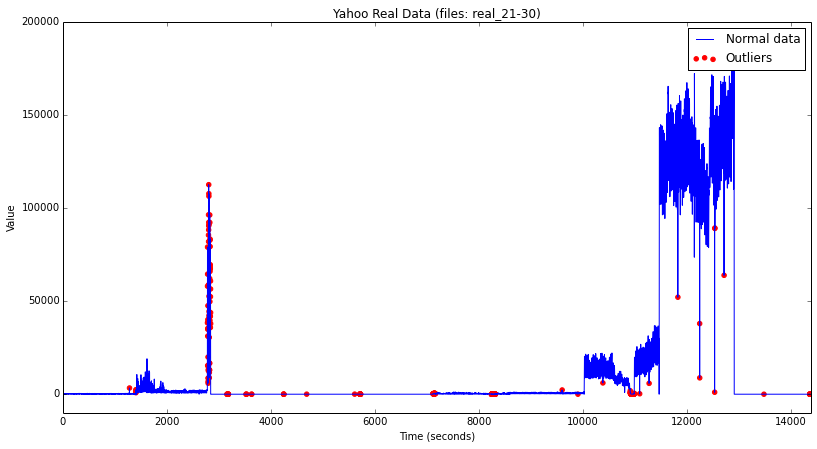

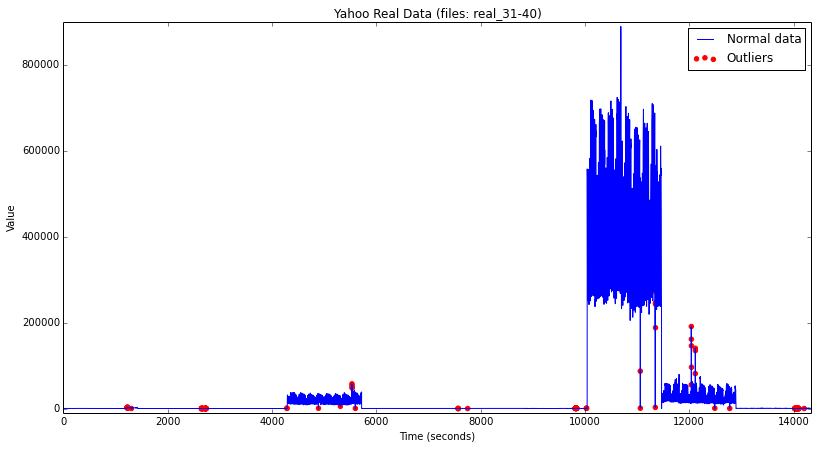

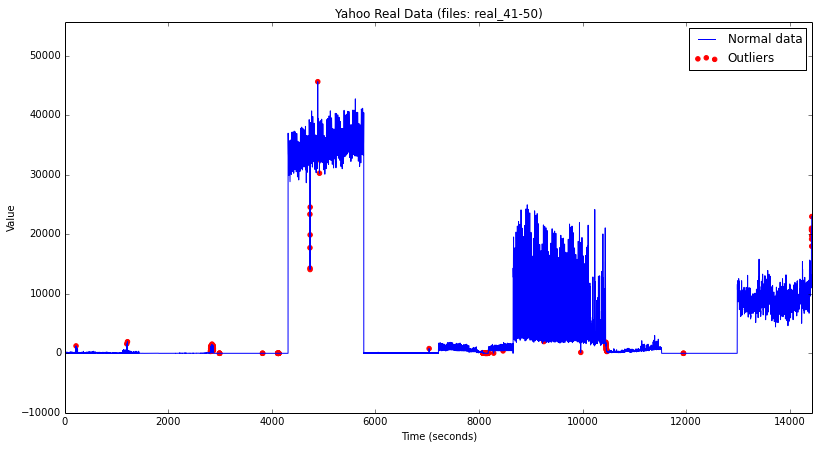

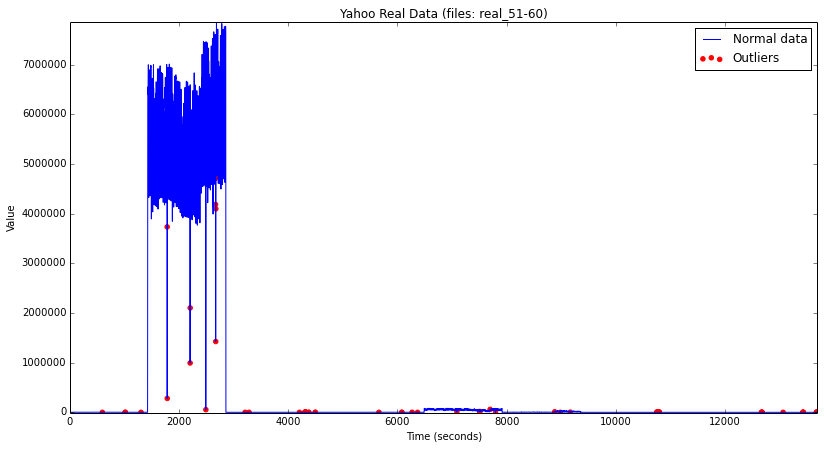

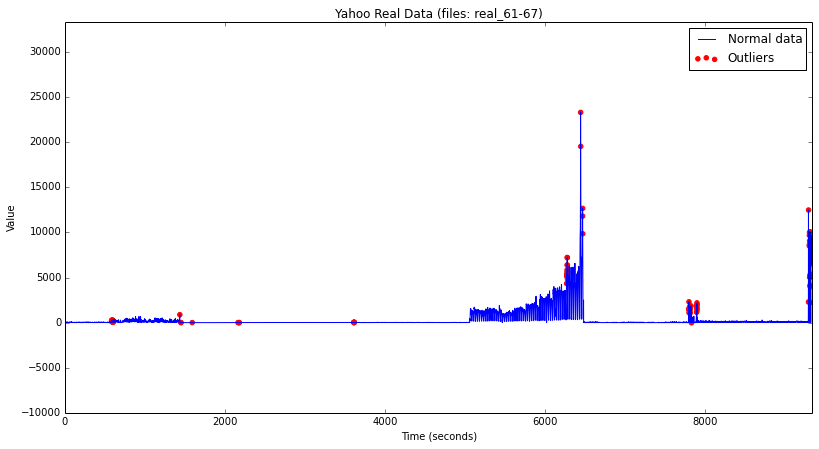

In [13]:
# block1: observe yahoo data to selece proper data files for the next experiments 

def load_data_plot(st_file, ed_file):
    
    dta_folder="/home/guo/Downloads/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark/real_"

    curr_cnt=0
    for i in range(st_file, ed_file):
        tmpdf= pd.read_csv( dta_folder + str(i) + ".csv")
        
        if (i-st_file) == 0 :
            tdf= tmpdf
        else:
            tmpdf.drop('timestamp', axis=1, inplace=True)
            tmp_col=  range( curr_cnt+1, curr_cnt + tmpdf.shape[0]+1 ) 
            tmpdf.insert(0, 'timestamp', tmp_col)
            tdf = tdf.append(tmpdf)
        curr_cnt = curr_cnt + tmpdf.shape[0]
    
    print "size of noisy data:", tdf.shape
    
    maxval= max(tdf['value'])
    minval= min(tdf['value'])
    outliers= tdf[ tdf['is_anomaly'] ==1  ]
    
    figure_size= ( 13.4,7)
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )

    plt.plot( list( tdf['value']), label='Normal data' )
    plt.scatter( list(outliers['timestamp']),list(outliers['value']), color='red',\
                label='Outliers'  )

    axes = plt.gca()
    axes.set_xlim([1, tdf.shape[0]+10])
    axes.set_ylim([-10000,maxval+10000])
  
    plt.title('Yahoo Real Data ('+'files: real_'+str(st_file)+'-'+str(ed_file-1)+')')
    plt.ylabel('Value')
    plt.xlabel('Time (seconds)')
    plt.legend()
#     plt.legend(loc=0, ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )
    

for i in range(6):
    

    file1=i*10+1
    file2=(i+1)*10+1
    
    load_data_plot(file1, file2)
    

load_data_plot(61, 68)
  
    

(1420, 3)
(1439, 3)
(1461, 3)
size of clean data: (4287, 3)
size of noisy data: (4320,) 4320


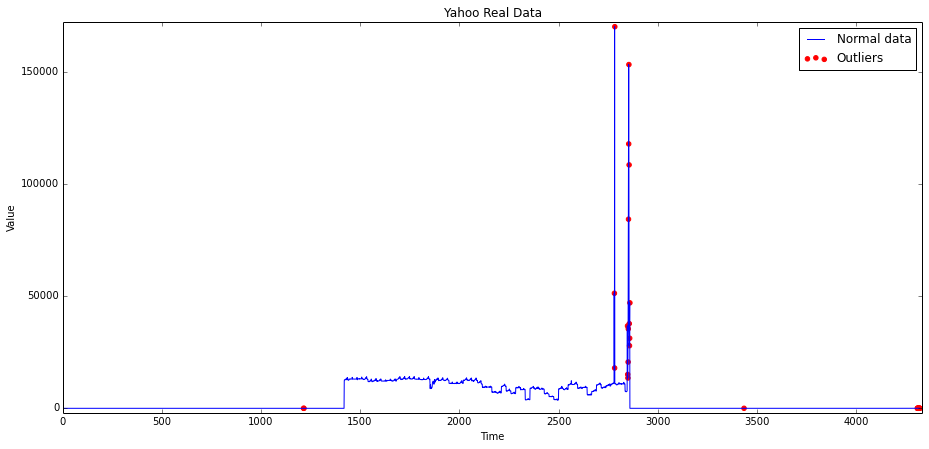

In [107]:
# block2:

# load and extract yahoo data
# choose the data in files real_11-20, which contains a time series (data point 3000 - 10000) with mediate 
#  outlier magnitude 

is_clean=0

curr_cnt=0
st_file=1
ed_file=4

dta_folder="/home/guo/Downloads/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark/real_"
# dta_folder=
# "/home/guo/Downloads/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_"

for i in range(st_file, ed_file):
    tmpdf= pd.read_csv( dta_folder + str(i) + ".csv")
    
#     tmpdf[ 'timestamp' ] = tmpdf[ 'timestamp' ].astype(int64)
#     tmpdf[ 'value' ] = tmpdf[ 'value' ].astype(float64)
#     tmpdf[ 'is_anomaly' ] = tmpdf[ 'is_anomaly' ].astype(int64)
    
    print tmpdf.shape
    
    if (i-st_file) == 0 :
        tdf1= tmpdf
    else:
        tmpdf.drop('timestamp', axis=1, inplace=True)
        tmp_col=  range( curr_cnt+1, curr_cnt + tmpdf.shape[0]+1 ) 
        tmpdf.insert(0, 'timestamp', tmp_col)
        tdf1 = tdf1.append(tmpdf)
    
    curr_cnt = curr_cnt + tmpdf.shape[0]


tdf=tdf1
    
maxval= max(tdf['value'])
minval= min(tdf['value'])

outlier_tdf= tdf[ tdf['is_anomaly'] ==1  ]
clean_tdf =  tdf[ tdf['is_anomaly'] ==0  ]

if is_clean==1:
    ts= clean_tdf['value']
else:
    ts= tdf['value']
    
ts_flag= list(tdf['is_anomaly'])

print "size of clean data:",clean_tdf.shape
print "size of noisy data:", ts.shape, len(ts_flag)
# .............plot.................

figure_size= ( 15.4,7)
legend_font= 8.5
fig = plt.figure()
fig.set_size_inches( figure_size )

axes = plt.gca()
axes.set_xlim([1, tdf.shape[0]+10])
axes.set_ylim([-2000,maxval+2000])

plt.plot( list( tdf['value']), label='Normal data' )
# plt.plot( list( clean_tdf['value']), color='g' )
plt.scatter( list(outlier_tdf['timestamp']),list(outlier_tdf['value']), color='red',\
             label='Outliers')
# plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
# axes.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Yahoo Real Data')
plt.ylabel('Value')
plt.xlabel('Time')
# plt.legend( loc='upper left',fontsize=12 )
plt.legend()
#     bbox_to_anchor=(0., 1.0, 1., .10),
#            loc=0,
#            ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )




In [94]:
# block4: data pre-processing

# re-organize the data to the format for feeding into the RNN 

import pandas as pd
from random import random
import numpy as np


def extract_load_data( ts_df, st_idx, ed_idx):
    tmpdta = ts_df.iloc[st_idx: ed_idx]
    cnt= len(tmpdta)
    tmpx=[]
    tmpy=[]
    for i in range(cnt-1):
        tmpx.append( tmpdta.iloc[i].as_matrix() )
        tmpy.append( tmpdta.iloc[i+1].as_matrix() )

    return tmpx, tmpy, tmpdta.iloc[cnt-1].as_matrix()

def format_timeseries_rnn(ts):
    tmptrnx =[]
    tmptrny =[]
    
    ts_df= pd.DataFrame(ts)
    
    tmpPre = 0
    tmpCur = len(ts)
    
    tmpx,tmpy, tmpy1 = extract_load_data( ts_df, tmpPre,tmpCur)
    tmptrnx.append(tmpx)
    tmptrny.append(tmpy)
    
    # qualified format for rnn
    dtax = np.array( tmptrnx )
    dtay = np.array( tmptrny )

#     print dtax.shape, dtay.shape
    return dtax, dtay



In [106]:
# block5:  RNN configureation

hidden_neurons = 350

# learning rate
lr_val = 0.001

# all the available optimizers
sgd = SGD(lr= lr_val, momentum=0.05, decay=0.0, nesterov=True)
rms = RMSprop(lr= lr_val, rho=0.9, epsilon=1e-06)

#Keras says: it is recommended to leave the parameters of this optimizer 
# at their default values for the two optimizers below
adagrad = Adagrad(lr=0.01, epsilon=1e-06)
adadelta = Adadelta(lr=1.0,rho=0.95,epsilon=1e-06)

adam =  Adam(lr= lr_val, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
adamax = Adamax(lr= lr_val, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

opt_list=[ sgd, rms, adagrad, adadelta, adam, adamax ]
opt_namelist=[ "SGD with Momentum","RMSprop","ADAGRAD","ADADELTA","ADAM","ADAMAX" ]

In [109]:
#block6: define a function for training RNN

# continusly feed the data into RNN to update the model
def rl_train_rnn(dtax, dtay, optimizer_config, loss_func, outlier_flag, regular_para):
    
    timesteps =1 
    in_out_neurons = 1
    test_step=2
    
    trn_size= dtax.shape[1]-3
    trnx = dtax 
    trny = dtay 
    
    testx=[]
    testy=[]
    testyh=[]

#     print trnx.shape, trny.shape

    rl_model = Sequential()
    rl_model.add(LSTM(hidden_neurons, return_sequences=True, stateful= True,\
                  batch_input_shape = (1,timesteps, in_out_neurons ) ,\
                      W_regularizer=l2( regular_para ) ))
    rl_model.add(TimeDistributedDense(output_dim= in_out_neurons ) )
    rl_model.add(Activation("linear")) 

    rl_model.compile(loss= loss_func, optimizer= optimizer_config )
#                  "r11460msprop")

    for i in range(trn_size):
        cur_trnx= trnx[:,i:i+1,:] 
        cur_trny= trny[:,i:i+1,:]
    
#     print 'data instance:', i, 'of size:', cur_trnx.shape, cur_trny.shape

        rl_model.train_on_batch(cur_trnx,cur_trny) 
    
        
        if i%test_step ==0 and ts_flag[i+2]!=1 and ts_flag[i+1]!=1 :
            vali_testx=  trnx[:, i+1:i+2,:]
            pred_test = rl_model.predict_on_batch( vali_testx )[0][0][0]
#             print "at time step:",i,":", pred_test, "--v.s.--",trnx[:, i+2:i+3,:][0][0]
        
            testx.append( vali_testx[0][0] )
            testy.append( trny[:, i+1:i+2,:][0][0])
#             testy.append( trnx[:, i+2:i+3,:][0][0])
            testyh.append( pred_test   )
            
        if i == trn_size-3 and ts_flag[i+2]!=1 and ts_flag[i+1]!=1 :
            vali_testx=  trnx[:, i+1:i+2,:]
            pred_test = rl_model.predict_on_batch( vali_testx )[0][0][0]
#             print "at time step:",i,":", pred_test, "--v.s.--", trnx[:, i+2:i+3,:][0][0]
        
            testx.append( vali_testx[0][0] )
            testy.append( trny[:, i+1:i+2,:][0][0])
            testyh.append( pred_test   )
    
    return testx, testy, testyh
    
def test_result_plot(testx, testy, testyh, method_name, isNoise):
    
    fig = plt.figure()
    figure_size= ( 15.4,7)
    fig.set_size_inches( figure_size )
    
    plt.title('Online prediction by RNN trained using '+ method_name + ' on '+isNoise )
    plt.ylabel('Value')
    plt.xlabel('Time')

    plt.plot(testy, label='Truth')
    plt.plot(testyh, label='Prediction')
#     plt.scatter( list(outlier_tdf['timestamp']),list(outlier_tdf['value']), color='red',\
#              label='Outliers')
    
    plt.legend( loc='upper right',fontsize=15 )

    axes = plt.gca()
    axes.set_xlim([1, len(testx)+10])
    axes.set_ylim([-2000,38000])

    cnt= len(testy)

    nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) for i in range(cnt)])*1.0/cnt)
    print 'Normalzied MSE using '+ method_name + ' on '+ isNoise + ': ', nmse


Normalzied MSE using SGD with Momentum on NOISY data:  1116.20377562
Normalzied MSE using RMSprop on NOISY data:  6177.19936821
Normalzied MSE using ADAGRAD on NOISY data:  6186.70332095
Normalzied MSE using ADADELTA on NOISY data:  5950.768381
Normalzied MSE using ADAM on NOISY data:  6187.95898618
Normalzied MSE using ADAMAX on NOISY data:  6180.38005614


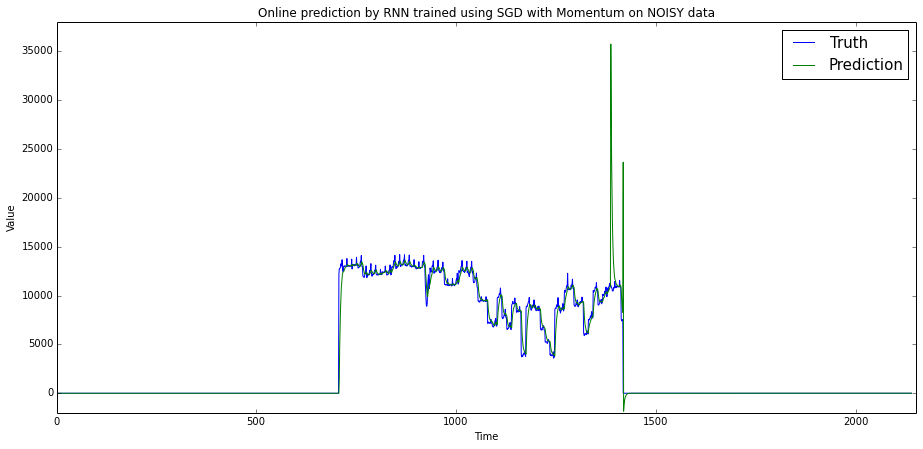

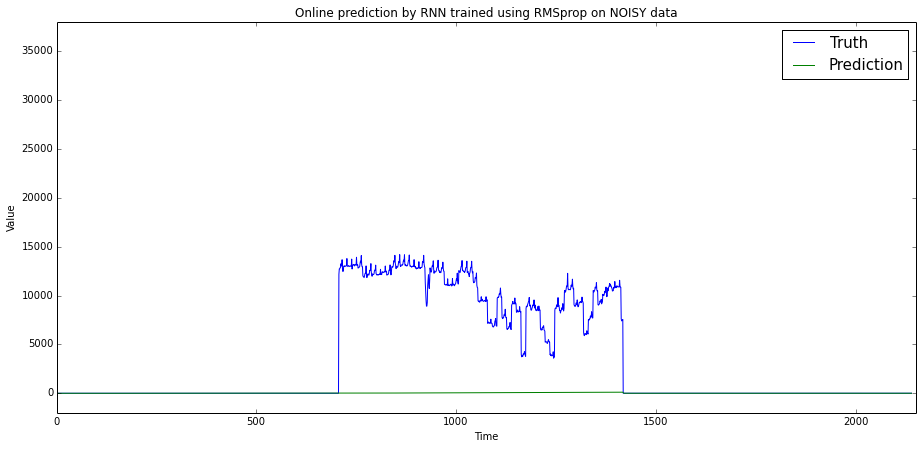

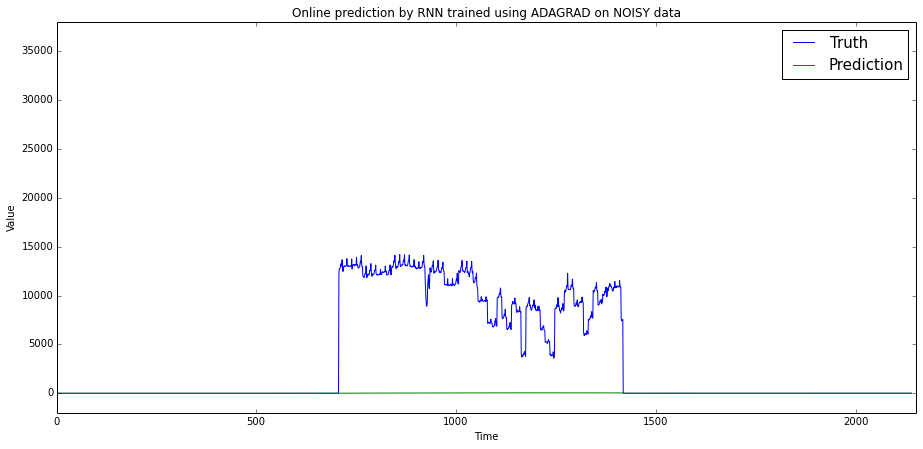

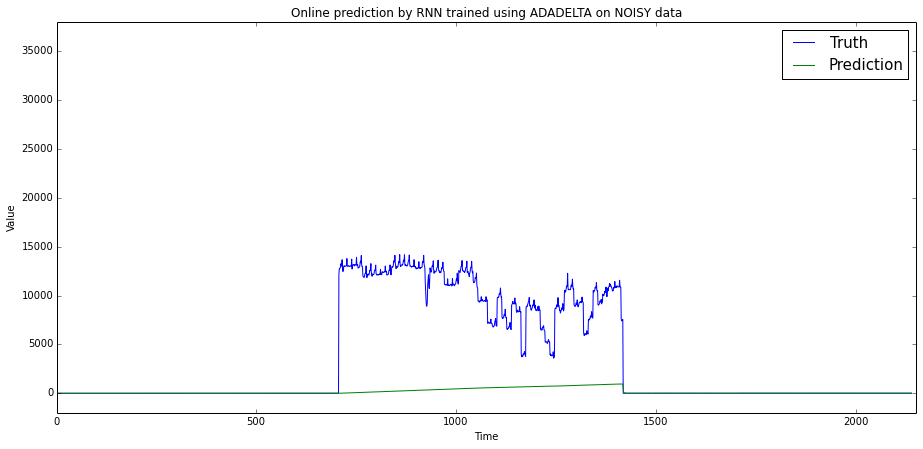

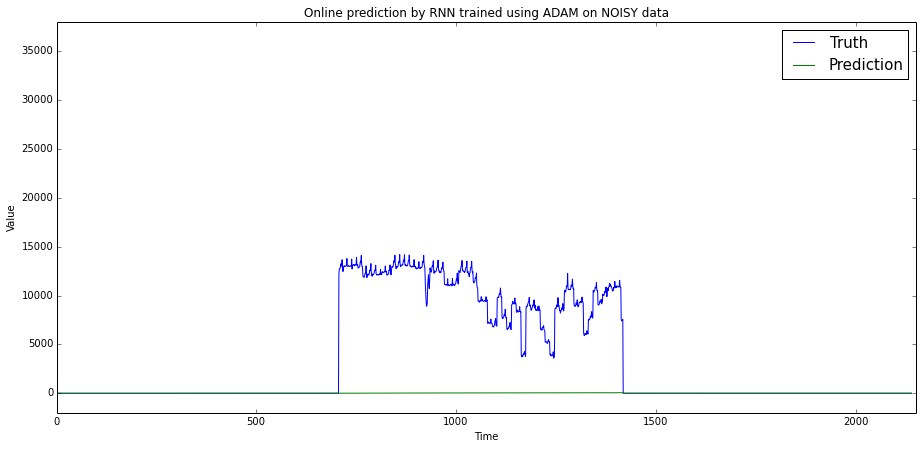

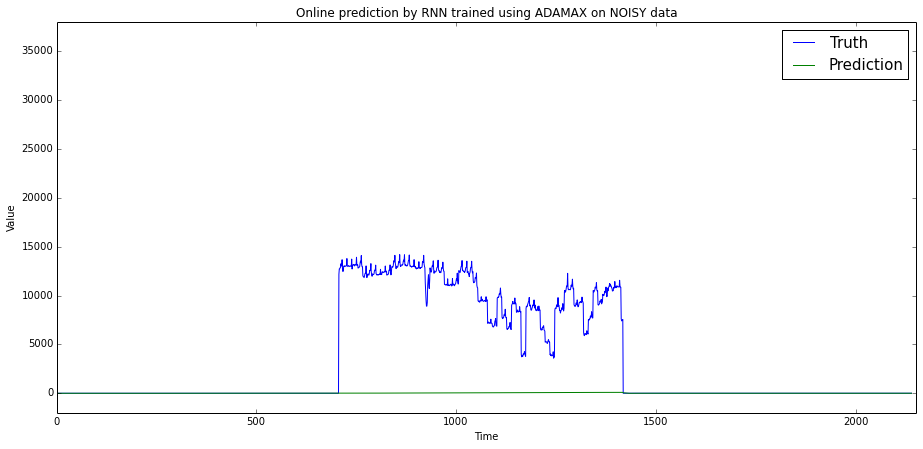

In [110]:
# block 7: real-time train RNN on NOISE data 
# by different optimzers and plot the prediction results

dtax, dtay = format_timeseries_rnn( tdf['value'] )
loss_func = "mean_squared_error"

# len(opt_list)
for i in range(len(opt_list)):
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, opt_list[i], loss_func, ts_flag)
    test_result_plot(tst_x, tst_y, tst_pred_y, opt_namelist[i], "NOISY data")
    
    

(1, 2868, 1) (1, 2868, 1)
(1, 2868, 1) (1, 2868, 1)
Normalzied MSE: 706.198218555
(1, 2868, 1) (1, 2868, 1)
Normalzied MSE: 7543.97790685
(1, 2868, 1) (1, 2868, 1)
Normalzied MSE: 7553.21084515
(1, 2868, 1) (1, 2868, 1)
Normalzied MSE: 7395.53797214
(1, 2868, 1) (1, 2868, 1)
Normalzied MSE: 7497.11991077
(1, 2868, 1) (1, 2868, 1)
Normalzied MSE: 7546.42912532


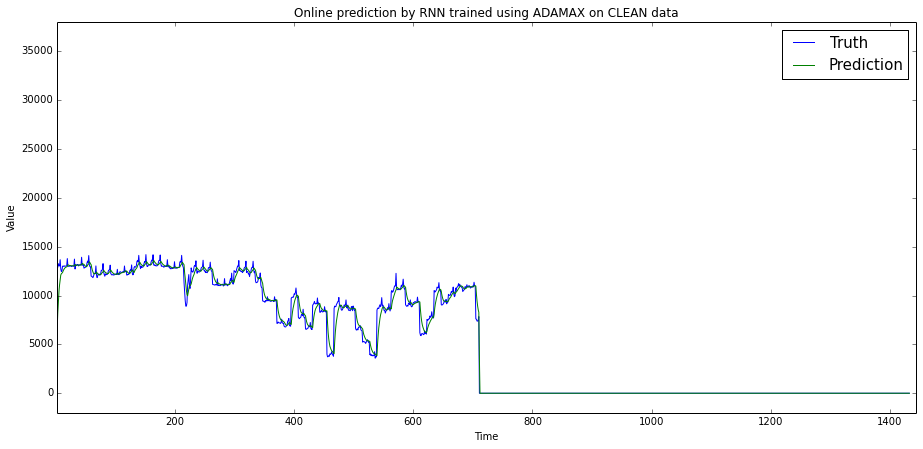

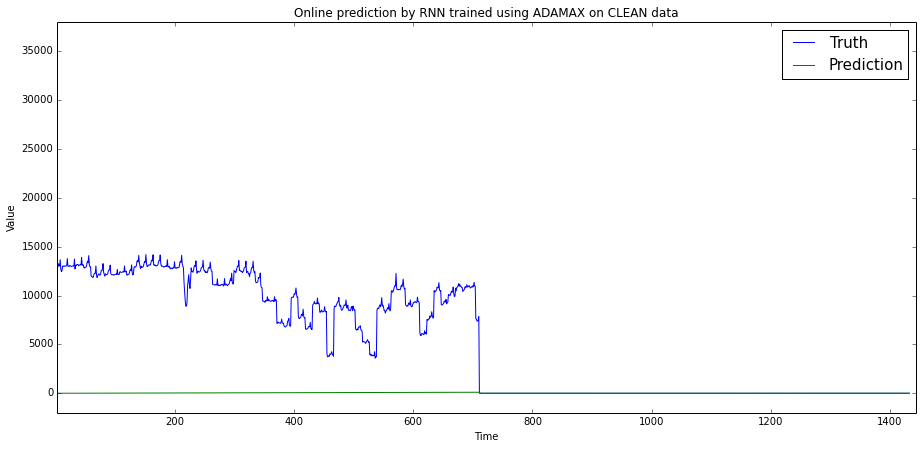

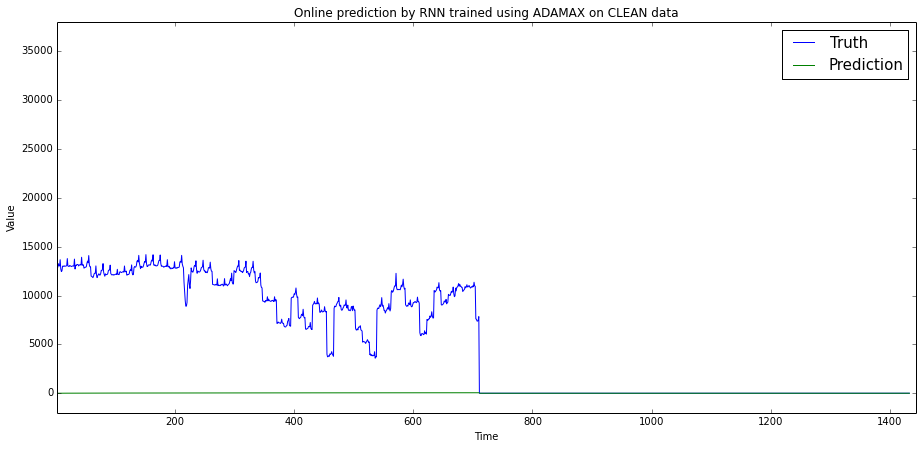

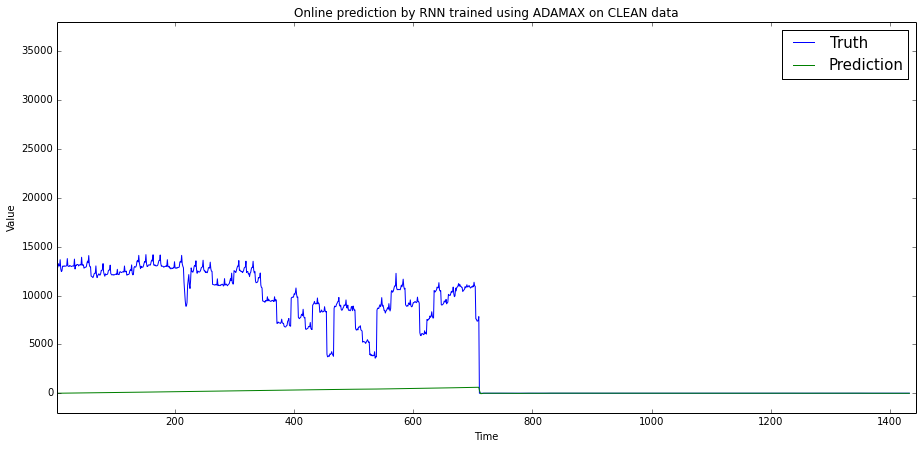

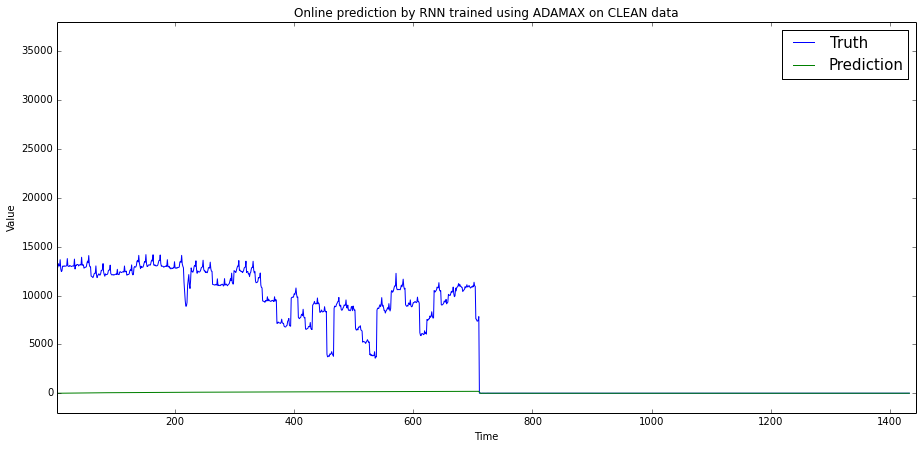

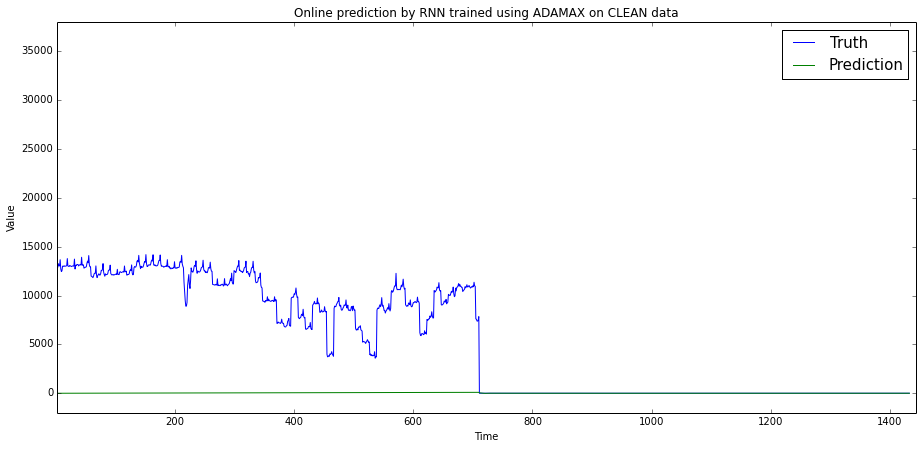

In [84]:
# block 8: real-time train RNN on CLEAN data 
# by different optimzers and plot the prediction results

dtax, dtay = format_timeseries_rnn(  clean_tdf['value'])
loss_func = "mean_squared_error"
allzero_ts_flag = [0]*len(dtax[0])

for optzer in opt_list:
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, optzer, loss_func,allzero_ts_flag)
    test_result_plot(tst_x, tst_y, tst_pred_y ,opt_namelist[i],"CLEAN data")
    
    

In [97]:
# block 8
def prediction_learningRate_plot( tst_y, pred_y_lr, method_name ):
    
    fig = plt.figure()
    figure_size= ( 15.4,7)
    fig.set_size_inches( figure_size )
    
    plt.title('Online prediction by RNN trained using '+ method_name + ' on NOISY data' )
    plt.ylabel('Value')
    plt.xlabel('Time')

    plt.plot(tst_y, label='Truth')

    print ('Numerical errors on '+ method_name + ':' )
    
    for i in range(len(lr_vals)):
        plt.plot(pred_y_lr[i], label='Prediction on learning rate '+ str( lr_vals[i] ) )
    
        cnt= len(tst_y)
        nmse = sqrt(sum([(tst_y[j]- pred_y_lr[i][j])*(tst_y[j]-  pred_y_lr[i][j] ) for j in range(cnt)])*1.0/cnt)
        print 'Normalzied MSE on learning rate '+ str( lr_vals[i])+':', nmse
    
    plt.legend( loc='upper right',fontsize=15 )

    axes = plt.gca()
    axes.set_xlim([1, len(tst_y)+10])
    axes.set_ylim([-2000,38000])


Numerical errors on SGD:
Normalzied MSE on learning rate 0.0001: 1456.61527475
Normalzied MSE on learning rate 0.001: 1113.75949696
Normalzied MSE on learning rate 0.01: 7149.09569761
Numerical errors on RMSprop:
Normalzied MSE on learning rate 0.0001: 6202.00966882
Normalzied MSE on learning rate 0.001: 6180.13466764
Normalzied MSE on learning rate 0.01: 5907.74801984
Normalzied MSE on learning rate 0.1: 6142.40782181
Normalzied MSE on learning rate 1: 2037.14537196
Normalzied MSE on learning rate 10: 4638.25163999
Numerical errors on Adam:
Normalzied MSE on learning rate 0.0001: 6176.07928009
Normalzied MSE on learning rate 0.001: 6173.49752375
Normalzied MSE on learning rate 0.01: 6172.89995794
Normalzied MSE on learning rate 0.1: 6167.62692063
Normalzied MSE on learning rate 1: 6177.17675095
Normalzied MSE on learning rate 10: 6169.10159163
Numerical errors on Adamax:
Normalzied MSE on learning rate 0.0001: 6181.2072312
Normalzied MSE on learning rate 0.001: 6177.62932219
Normalzie

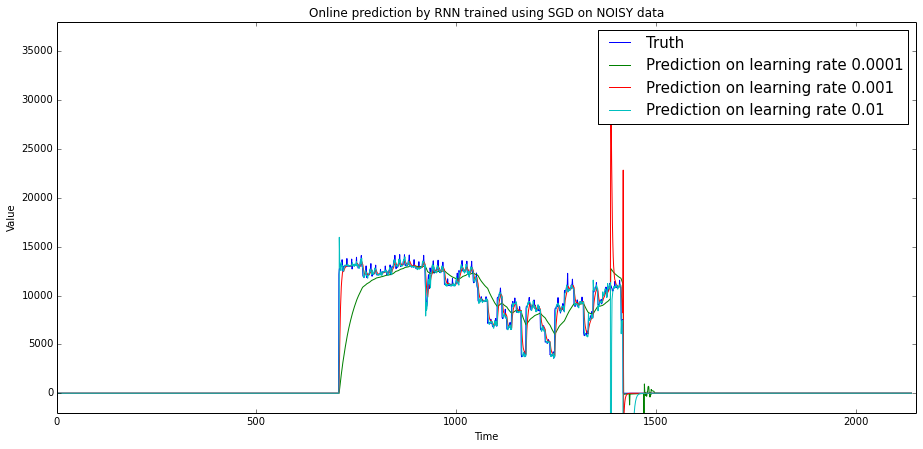

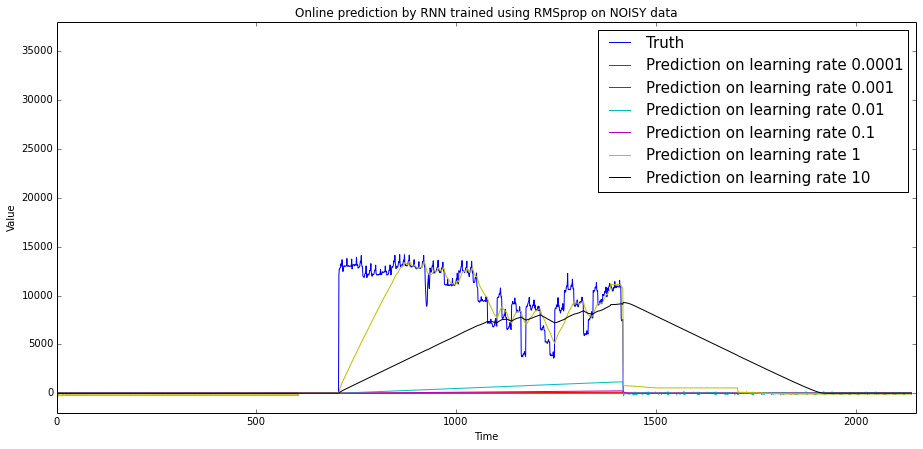

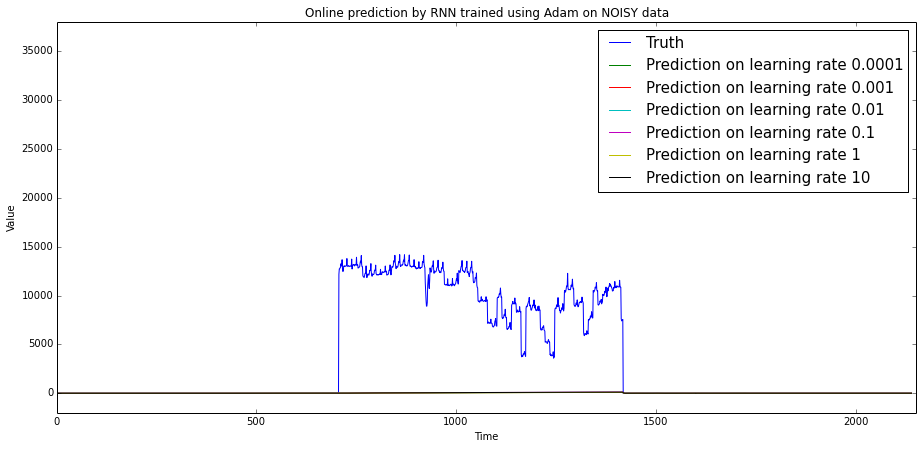

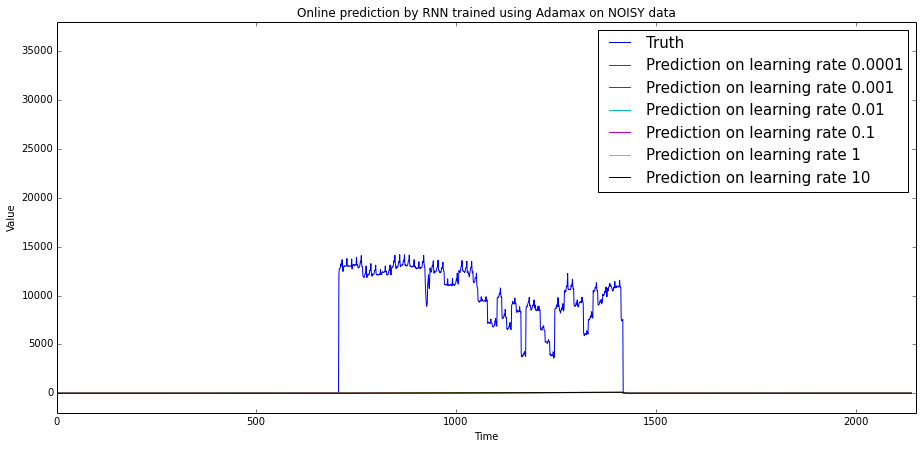

In [111]:
# block 9: train RNN by SGD optimizer under variable learning rates

dtax, dtay = format_timeseries_rnn( tdf['value'] )
loss_func = "mean_squared_error"

lr_vals=[0.0001,0.001, 0.01 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    sgd = SGD(lr= tmp_lr, momentum=0.05, decay=0.0, nesterov=True)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, sgd, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'SGD' )


lr_vals=[0.0001,0.001, 0.01, 0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    rms = RMSprop(lr= tmp_lr, rho=0.9, epsilon=1e-06)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, rms, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'RMSprop' )


#Keras says: it is recommended to leave the parameters of this optimizer 
# at their default values for the two optimizers below

# lr_vals=[0.0001,0.001, 0.01,0.1, 1, 10 ]
# pred_y_lr=[]
# for tmp_lr in lr_vals:
#     adagrad = Adagrad(lr=0.01, epsilon=1e-06)
#     tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adagrad, loss_func,ts_flag)
#     pred_y_lr.append(tst_pred_y)
# prediction_learningRate_plot( tst_y, pred_y_lr, 'Adagrad' )

# lr_vals=[0.0001,0.001, 0.01 , 0.1, 1,10 ]
# pred_y_lr=[]
# for tmp_lr in lr_vals:
#     adadelta = Adadelta(lr=1.0,rho=0.95,epsilon=1e-06)
#     tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adadelta, loss_func,ts_flag)
#     pred_y_lr.append(tst_pred_y)
# prediction_learningRate_plot( tst_y, pred_y_lr, 'Adadelta' )


lr_vals=[0.0001,0.001, 0.01 ,0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    adam =  Adam(lr= lr_val, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adam, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'Adam' )


lr_vals=[0.0001,0.001, 0.01 ,0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    adamax = Adamax(lr= lr_val, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adamax, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'Adamax' )
    


Numerical errors on SGD:
Normalzied MSE on learning rate 0.0001: 6203.72472469
Normalzied MSE on learning rate 0.001: 6178.32282975
Normalzied MSE on learning rate 0.01: 5883.62298746
Numerical errors on RMSprop:
Normalzied MSE on learning rate 0.0001: 6203.6437036
Normalzied MSE on learning rate 0.001: 6180.0261508
Normalzied MSE on learning rate 0.01: 6018.69481866
Normalzied MSE on learning rate 0.1: 6170.12446775
Normalzied MSE on learning rate 1: 3785.46738312
Normalzied MSE on learning rate 10: 4765.24844636
Numerical errors on Adam:
Normalzied MSE on learning rate 0.0001: 6181.22824117
Normalzied MSE on learning rate 0.001: 6176.47773153
Normalzied MSE on learning rate 0.01: 6179.87433023
Normalzied MSE on learning rate 0.1: 6177.25012187
Normalzied MSE on learning rate 1: 6181.98016077
Normalzied MSE on learning rate 10: 6172.5718523
Numerical errors on Adamax:
Normalzied MSE on learning rate 0.0001: 6180.55336626
Normalzied MSE on learning rate 0.001: 6180.47513231
Normalzied 

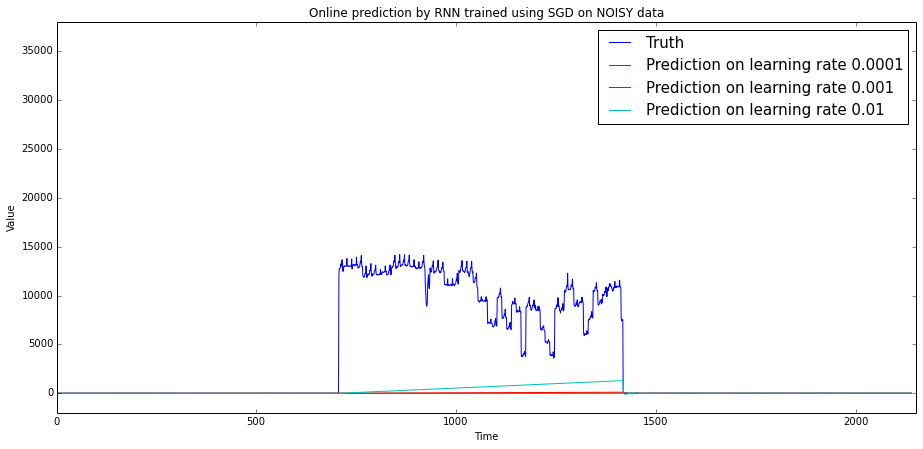

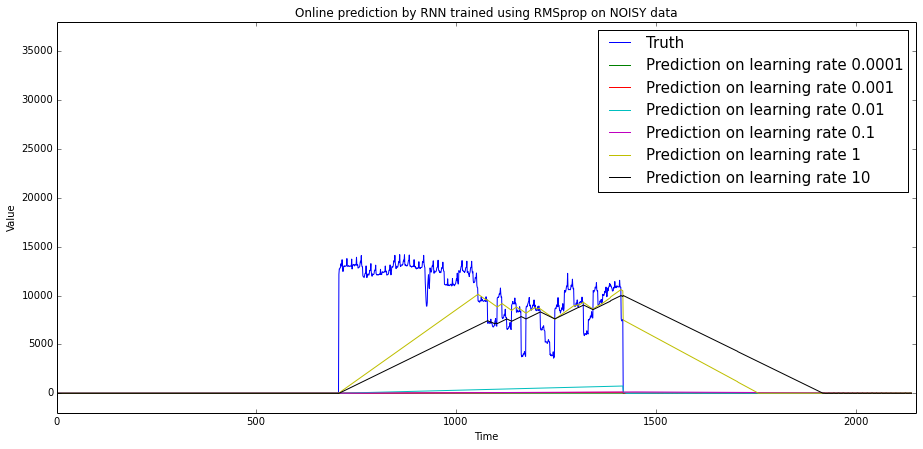

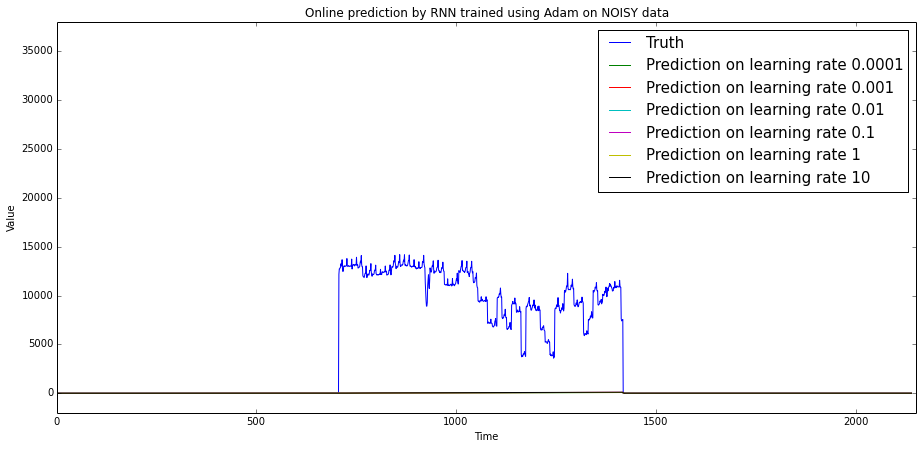

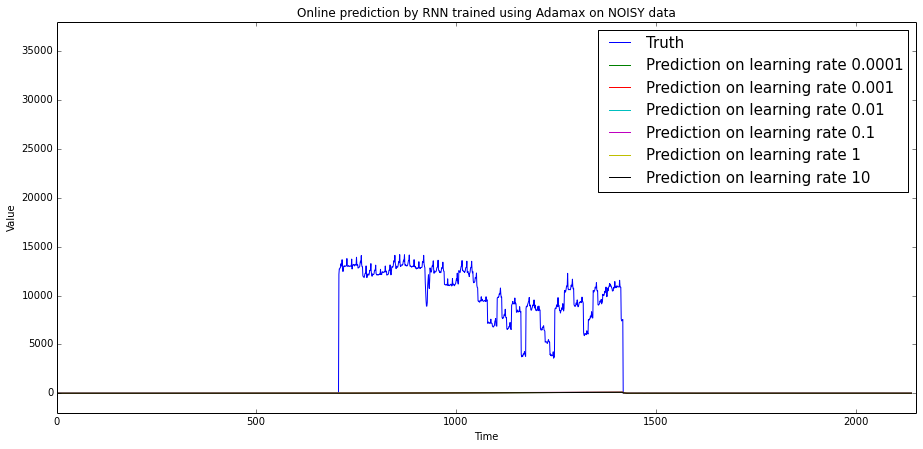

In [112]:
# block 10: train RNN by SGD optimizer under variable learning rates

dtax, dtay = format_timeseries_rnn( tdf['value'] )
loss_func = "mean_absolute_error"

lr_vals=[0.0001,0.001, 0.01 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    sgd = SGD(lr= tmp_lr, momentum=0.05, decay=0.0, nesterov=True)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, sgd, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'SGD' )


lr_vals=[0.0001,0.001, 0.01, 0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    rms = RMSprop(lr= tmp_lr, rho=0.9, epsilon=1e-06)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, rms, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'RMSprop' )


#Keras says: it is recommended to leave the parameters of this optimizer 
# at their default values for the two optimizers below

# lr_vals=[0.0001,0.001, 0.01,0.1, 1, 10 ]
# pred_y_lr=[]
# for tmp_lr in lr_vals:
#     adagrad = Adagrad(lr=0.01, epsilon=1e-06)
#     tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adagrad, loss_func,ts_flag)
#     pred_y_lr.append(tst_pred_y)
# prediction_learningRate_plot( tst_y, pred_y_lr, 'Adagrad' )

# lr_vals=[0.0001,0.001, 0.01 , 0.1, 1,10 ]
# pred_y_lr=[]
# for tmp_lr in lr_vals:
#     adadelta = Adadelta(lr=1.0,rho=0.95,epsilon=1e-06)
#     tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adadelta, loss_func,ts_flag)
#     pred_y_lr.append(tst_pred_y)
# prediction_learningRate_plot( tst_y, pred_y_lr, 'Adadelta' )


lr_vals=[0.0001,0.001, 0.01 ,0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    adam =  Adam(lr= lr_val, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adam, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'Adam' )


lr_vals=[0.0001,0.001, 0.01 ,0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    adamax = Adamax(lr= lr_val, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adamax, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'Adamax' )
    


In [ ]:
# block 11: train RNN under different regularization parameter

dtax, dtay = format_timeseries_rnn( tdf['value'] )
loss_func = "mean_squared_error"

lr_vals=[0.0001,0.001, 0.01 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    sgd = SGD(lr= tmp_lr, momentum=0.05, decay=0.0, nesterov=True)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, sgd, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'SGD' )


lr_vals=[0.0001,0.001, 0.01, 0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    rms = RMSprop(lr= tmp_lr, rho=0.9, epsilon=1e-06)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, rms, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'RMSprop' )


lr_vals=[0.0001,0.001, 0.01,0.1, 1, 10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    adagrad = Adagrad(lr=0.01, epsilon=1e-06)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adagrad, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'Adagrad' )

lr_vals=[0.0001,0.001, 0.01 , 0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    adadelta = Adadelta(lr=1.0,rho=0.95,epsilon=1e-06)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adadelta, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'Adadelta' )


lr_vals=[0.0001,0.001, 0.01 ,0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    adam =  Adam(lr= lr_val, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adam, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'Adam' )


lr_vals=[0.0001,0.001, 0.01 ,0.1, 1,10 ]
pred_y_lr=[]
for tmp_lr in lr_vals:
    adamax = Adamax(lr= lr_val, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    tst_x, tst_y, tst_pred_y = rl_train_rnn(dtax, dtay, adamax, loss_func,ts_flag)
    pred_y_lr.append(tst_pred_y)
prediction_learningRate_plot( tst_y, pred_y_lr, 'Adamax' )
    


segment 0 : 3535 7.3622216711 3535
segment 1 : 843 2036.11904178 4378
segment 2 : 752 93560.8483867 5130
segment 3 : 3407 45601.594658 8537
segment 4 : 2810 33249.3898836 11347
lenght of time series: 11347
segment 0 : 502 3.94524826667 502
segment 1 : 258 11301.9238323 760
segment 2 : 1427 92548.2320069 2187
segment 3 : 496 67502.2120112 2683
segment 4 : 1169 65371.3458047 3852
lenght of time series: 3852
11347


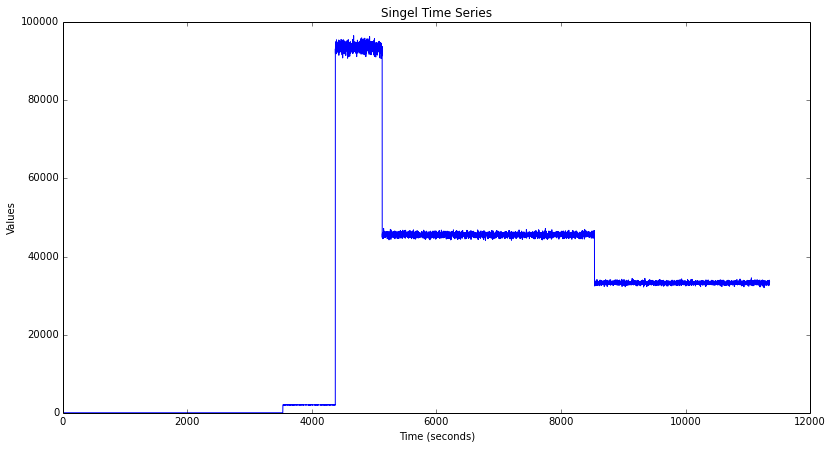

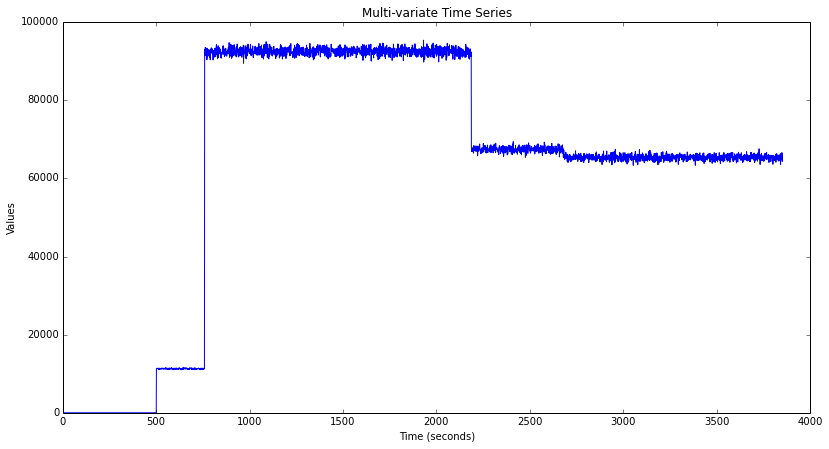

In [4]:
# block1: synthetic data

seg_num=5
seg_len_min= 1000
seg_len_max= 4000

mean_min=1
mean_max= 100000
var_min = 1
var_max=100

num_multi_ts=1

figure_size= ( 13.4,7)

def generate_one_ts():
    
    tmpts=[]
    tcnt=0
    tmp_cp_list=[]
    for i in range(seg_num):
        seg_len = int(np.random.uniform([seg_len_min, seg_len_max, 1])[1])
        seg_mean = np.random.uniform([mean_min, mean_max, 1])[1]
        seg_var = seg_mean*0.01
#         np.random.uniform([var_min, var_max, 1])[1]
        
        if i ==0:
            seg_mean = np.random.uniform([1, 10, 1])[1]
            seg_var = seg_mean*0.01
        
        
        if i > 0:
            
        
        
        
        print "segment",i,":",seg_len, seg_mean, tcnt+seg_len
        tmp= np.random.normal( seg_mean, seg_var, seg_len )
        tmp_cp_list.append( tcnt )
        tcnt= tcnt + seg_len   
        [tmpts.append(i) for i in tmp]
    
    return tmpts, tmp_cp_list
    

# single time series 
sts, sts_cps= generate_one_ts()
print "lenght of time series:", len(sts)

fig = plt.figure()
fig.set_size_inches( figure_size )
plt.plot(sts)
plt.title('Singel Time Series')
plt.ylabel('Values')
plt.xlabel('Time (seconds)')


# multi time series
tmp_mts=[]
tmp_mts_cps=[]
tmp_len=[]

fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Multi-variate Time Series')
plt.ylabel('Values')
plt.xlabel('Time (seconds)')


for i in range(num_multi_ts):
    tmp_ts, tmp_cp_list= generate_one_ts()
    print "lenght of time series:", len(tmp_ts)
    tmp_len.append(len(tmp_ts))
    tmp_mts.append(tmp_ts)
    tmp_mts_cps.append(tmp_cp_list)
    
#  organize the format of multi-time series for feeding into RNN
mts_len = min(tmp_len)
tmp_mts = [ tmp_mts[i][:mts_len]    for i in range(num_multi_ts)  ]
[   plt.plot(tmp_mts[i]) for i in range(num_multi_ts)  ]


def extract_multiTS_tuple(idx):
    tmplist=[]
    for i in range(num_multi_ts):
        tmplist.append( tmp_mts[i][idx] )
    return tmplist

mul_ts= [ extract_multiTS_tuple(i) for i in range(mts_len) ]

# print len( mul_ts), len(mul_ts[0])


# ---------
if num_multi_ts >1:
    ts= mul_ts
else:
    ts= sts

print len(ts)

In [17]:
# block6: real-time RNN training

# continusly feed the data into RNN to update the model
# 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation, TimeDistributedDense 
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop

# parameters
timesteps =1 
in_out_neurons = 1
trn_size= dtax.shape[1]-1
trnx = dtax 
trny = dtay 


testx=[]
testy=[]
testyh=[]

print trnx.shape, trny.shape

rl_model = Sequential()
rl_model.add(LSTM(hidden_neurons, return_sequences=True, stateful= True,\
                  batch_input_shape = (1,timesteps, in_out_neurons ) ))
rl_model.add(TimeDistributedDense(output_dim= in_out_neurons ) )
rl_model.add(Activation("linear")) 

rl_model.compile(loss="mean_squared_error", optimizer= rms )
#                  "r11460msprop")

for i in range(trn_size): 
    cur_trnx= trnx[:,i:i+1,:] 
    cur_trny= trny[:,i:i+1,:]
    
#     print 'data instance:', i, 'of size:', cur_trnx.shape, cur_trny.shape

    rl_model.train_on_batch(cur_trnx,cur_trny) 

    if i%50 ==0:
        vali_testx=  trnx[:, i+1:i+2,:]
        pred_test = rl_model.predict_on_batch( vali_testx )[0][0][0]
        print "at time step:",i,":", pred_test, "--v.s.--",trnx[:, i+2:i+3,:][0][0]
        
        testx.append( vali_testx[0][0] )
        testy.append( trnx[:, i+2:i+3,:][0][0])
        testyh.append( pred_test   )

    if i == trn_size-3:
        vali_testx=  trnx[:, i+1:i+2,:]
        pred_test = rl_model.predict_on_batch( vali_testx )[0][0][0]
        print "at time step:",i,":", pred_test, "--v.s.--", trnx[:, i+2:i+3,:][0][0]
        
        testx.append( vali_testx[0][0] )
        testy.append( trnx[:, i+2:i+3,:][0][0])
        testyh.append( pred_test   )
    
#     rl_model.fit(cur_trnx, cur_trny, batch_size=1, nb_epoch=10)
#     validation_split=0.05)

#     predicted = model.predict(X_test)
#     rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
#     model.predict( X_test[0:10] )

    
#     and maybe plot it
# pd.DataFrame(predicted).to_csv("predicted.csv")
# pd.DataFrame(y_test).to_csv("test_data.csv")

(1, 4239, 1) (1, 4239, 1)
at time step: 0 : [ 562.54901123] --v.s.-- [ 88.93374618]
at time step: 50 : [ 1267.54772949] --v.s.-- [ 1401.6720062]
at time step: 100 : [ 655.546875] --v.s.-- [ 581.61456924]
at time step: 150 : [-1199.80810547] --v.s.-- [-1092.07270774]
at time step: 200 : [-1214.57556152] --v.s.-- [-1099.86768675]
at time step: 250 : [ 566.04473877] --v.s.-- [ 559.32675234]
at time step: 300 : [ 1487.25537109] --v.s.-- [ 1389.15767462]
at time step: 350 : [ 194.59759521] --v.s.-- [ 116.96746895]
at time step: 400 : [-1398.06188965] --v.s.-- [-1319.72928971]
at time step: 450 : [-717.70404053] --v.s.-- [-760.23989]
at time step: 500 : [ 1013.48852539] --v.s.-- [ 984.9866643]
at time step: 550 : [ 1247.06848145] --v.s.-- [ 1204.62536913]
at time step: 600 : [-328.43435669] --v.s.-- [-373.40952794]
at time step: 650 : [-1440.81176758] --v.s.-- [-1376.72432014]
at time step: 700 : [-140.08908081] --v.s.-- [-239.04591791]
at time step: 750 : [ 1279.81872559] --v.s.-- [ 1294.82

In [38]:
#block: models for individual segments
seg_num=4
seg_len_min= 1000
seg_len_max= 2500

mean_min=1
mean_max= 100000
var_min = 1
var_max=100

# RNN parameters
timesteps =1 
in_out_neurons = 1

# figure_size= ( 13.4,7)

tmpts=[]
tmp_cp_list=[]
for i in range(seg_num):
    
    seg_len = int(np.random.uniform([seg_len_min, seg_len_max, 1])[1])
    seg_mean = np.random.uniform([mean_min, mean_max, 1])[1]
    seg_var = seg_mean * 0.1
        
    if i ==0 :
        seg_mean = np.random.uniform([1, 10, 1])[1]
        seg_var = seg_mean * 0.1
        
    print "----- segment--------",i,":",seg_len, seg_mean, seg_len
    tmp= np.random.normal( seg_mean, seg_var, seg_len )
        
    ts_df= pd.DataFrame(tmp)
        
    tmptrnx =[]
    tmptrny =[]
    tmpx,tmpy,tmpy1 = extract_load_data( ts_df, 0, seg_len-1)
    tmptrnx.append(tmpx)
    tmptrny.append(tmpy)
        
    # qualified format for rnn
    dtax = np.array( tmptrnx )
    dtay = np.array( tmptrny )

    print dtax.shape, dtay.shape
        
        
    trn_size= dtax.shape[1]-2
    trnx = dtax 
    trny = dtay 
        
    testx=[]
    testy=[]
    testyh=[]
        
    rl_model = Sequential()
    rl_model.add(LSTM(hidden_neurons, return_sequences=True, stateful= True,\
                  batch_input_shape = (1,timesteps, in_out_neurons ), W_regularizer=l2(1) ))
    rl_model.add(Dropout(0.25))

    rl_model.add(TimeDistributedDense(output_dim= in_out_neurons ) )

    rl_model.add(Activation("linear")) 



    rl_model.compile(loss="mean_squared_error",\
                     optimizer= sgd  )
        
    for i in range(trn_size):
        cur_trnx= trnx[:,i:i+1,:] 
        cur_trny= trny[:,i:i+1,:]
            
        rl_model.train_on_batch(cur_trnx,cur_trny) 
            
        if i%10 ==0:
            vali_testx=  trnx[:, i+1:i+2,:]
            pred_test = rl_model.predict_on_batch( vali_testx )[0][0][0]
            print "at time step:",i,":", pred_test, "--v.s.--",trnx[:, i+2:i+3,:][0][0]
        
            testx.append( vali_testx[0][0] )
            testy.append( trnx[:, i+2:i+3,:][0][0])
            testyh.append( pred_test   )
            
        if i == trn_size-3:
            vali_testx=  trnx[:, i+1:i+2,:]
            pred_test = rl_model.predict_on_batch( vali_testx )[0][0][0]
            print "at time step:",i,":", pred_test, "--v.s.--", trnx[:, i+2:i+3,:][0][0]
        
            testx.append( vali_testx[0][0] )
            testy.append( trnx[:, i+2:i+3,:][0][0])
            testyh.append( pred_test   )
    
    

----- segment-------- 0 : 53 4.93055495636 53
(1, 51, 1) (1, 51, 1)
at time step: 0 : [ 0.89831311] --v.s.-- [ 5.10449196]
at time step: 10 : [ 5.29281664] --v.s.-- [ 4.90745709]
at time step: 20 : [ 5.14964724] --v.s.-- [ 4.32968206]
at time step: 30 : [ 5.82564306] --v.s.-- [ 4.52276115]
at time step: 40 : [ 4.47621012] --v.s.-- [ 5.48717964]
at time step: 46 : [ 5.32787752] --v.s.-- [ 5.11798003]
----- segment-------- 1 : 1128 56643.9457239 1128
(1, 1126, 1) (1, 1126, 1)
at time step: 0 : [ 74148.625] --v.s.-- [ 55115.42457034]
at time step: 10 : [ 40107.74609375] --v.s.-- [ 55709.41285417]
at time step: 20 : [ 54878.28515625] --v.s.-- [ 55016.99247771]
at time step: 30 : [ 59105.75] --v.s.-- [ 50819.49811085]
at time step: 40 : [ 28584.109375] --v.s.-- [ 59742.15081456]
at time step: 50 : [ 75330.84375] --v.s.-- [ 51699.26520241]
at time step: 60 : [ 70867.734375] --v.s.-- [ 53528.94587608]
at time step: 70 : [ 82982.4453125] --v.s.-- [ 55842.78655898]
at time step: 80 : [ 60429.68

In [106]:
# block4: real-time rnn training on  yahoo data
from keras.models import Sequential 
from keras.layers.core import Dense, Activation, TimeDistributedDense 
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop

# parameters
timesteps =1 
in_out_neurons = 1
trn_size= dtax.shape[1]-1

is_cleanTrain= 0

trnx = dtax 
trny = dtay 

testx=[]
testy=[]
testyh=[]

print trnx.shape, trny.shape

rl_model = Sequential()
rl_model.add(LSTM(hidden_neurons, return_sequences=True, stateful= True,\
                  batch_input_shape = (1,timesteps, in_out_neurons ) ))
rl_model.add(TimeDistributedDense(output_dim= in_out_neurons ) )
rl_model.add(Activation("linear")) 

rl_model.compile(loss="mean_squared_error", optimizer= sgd )
#                  "rmsprop")

for i in range(trn_size): 
    
    if is_cleanTrain==1 and (ts_flag[i]==1 or ts_flag[i+1]==1):
        continue
    
    cur_trnx= trnx[:,i:i+1,:] 
    cur_trny= trny[:,i+1:i+2,:]
    
#     print 'data instance:', i, 'of size:', cur_trnx.shape, cur_trny.shape

    rl_model.train_on_batch(cur_trnx,cur_trny) 
    
    if ts_flag[i]==1:
        print '!!!! outlier happens', cur_trnx, cur_trny

    if i%2 ==0 and ts_flag[i+2]!=1 and ts_flag[i+1]!=1 :
        
        vali_testx=  trnx[:, i+1:i+2,:]
        pred_test = rl_model.predict_on_batch( vali_testx )[0][0][0]
#         print "at time step:",i,":", pred_test, "--v.s.--",trnx[:, i+2:i+3,:][0][0]
        
        testx.append( vali_testx[0][0] )
        testy.append( trnx[:, i+2:i+3,:][0][0])
        testyh.append( pred_test   )

#     if i == trn_size-3:
#         vali_testx=  trnx[:, i+1:i+2,:]
#         pred_test = rl_model.predict_on_batch( vali_testx )[0][0][0]
#         print "at time step:",i,":", pred_test, "--v.s.--", trnx[:, i+2:i+3,:][0][0]
        
#         testx.append( vali_testx[0][0] )
#         testy.append( trnx[:, i+2:i+3,:][0][0])
#         testyh.append( pred_test   )
    

(1, 11459, 1) (1, 11459, 1)
!!!! outlier happens [[[ 0.45868582]]] [[[ 0.78712659]]]
!!!! outlier happens [[[ 0.78712659]]] [[[ 0.26777756]]]
!!!! outlier happens [[[ 51251.]]] [[[ 170029.]]]
!!!! outlier happens [[[ 17953.]]] [[[ 10955.]]]
!!!! outlier happens [[[ 170029.]]] [[[ 10984.]]]
!!!! outlier happens [[[ 36705.]]] [[[ 13509.]]]
!!!! outlier happens [[[ 15091.]]] [[[ 20628.]]]
!!!! outlier happens [[[ 13509.]]] [[[ 35399.]]]
!!!! outlier happens [[[ 20628.]]] [[[ 84250.]]]
!!!! outlier happens [[[ 35399.]]] [[[ 117800.]]]
!!!! outlier happens [[[ 84250.]]] [[[ 153159.]]]
!!!! outlier happens [[[ 117800.]]] [[[ 108454.]]]
!!!! outlier happens [[[ 153159.]]] [[[ 37714.]]]
!!!! outlier happens [[[ 108454.]]] [[[ 27883.]]]
!!!! outlier happens [[[ 37714.]]] [[[ 31215.]]]
!!!! outlier happens [[[ 27883.]]] [[[ 46988.]]]
!!!! outlier happens [[[ 31215.]]] [[[ 3.71666667]]]
!!!! outlier happens [[[ 46988.]]] [[[ 3.61083333]]]
!!!! outlier happens [[[ 5.33027778]]] [[[ 3.63333333]]]
!

Normalzied MSE: 364.572095174


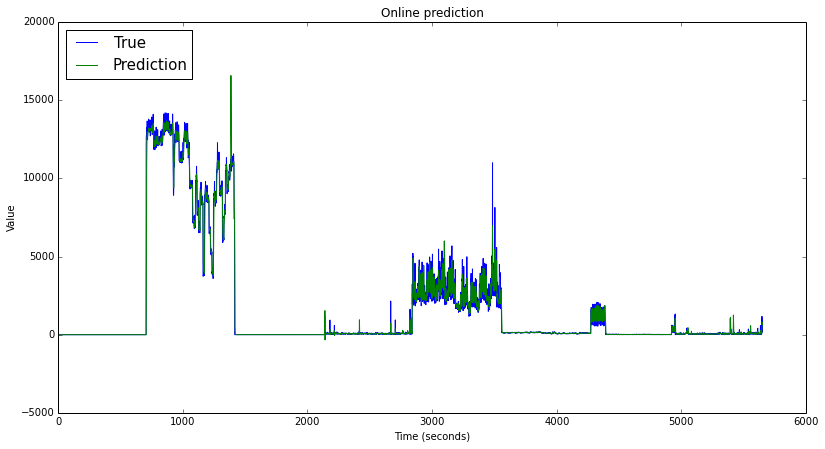

In [102]:
#  yahoo data clean

#  accuracy evaluation: plot

tst_yah_x = testx
tst_yah_y = testy
tst_yah_yh = testyh

fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_yah_y, label='True')
plt.plot(tst_yah_yh, label='Prediction')
plt.legend( loc='upper left',fontsize=15 )

# axes = plt.gca()
# axes.set_xlim([1, tdf.shape[0]+10])
# axes.set_ylim([-1000,1000])

#  error calculation

cnt= len(testy)

nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) for i in range(cnt)])*1.0/cnt)
print 'Normalzied MSE:', nmse


5651
Normalzied MSE: 364.572095174


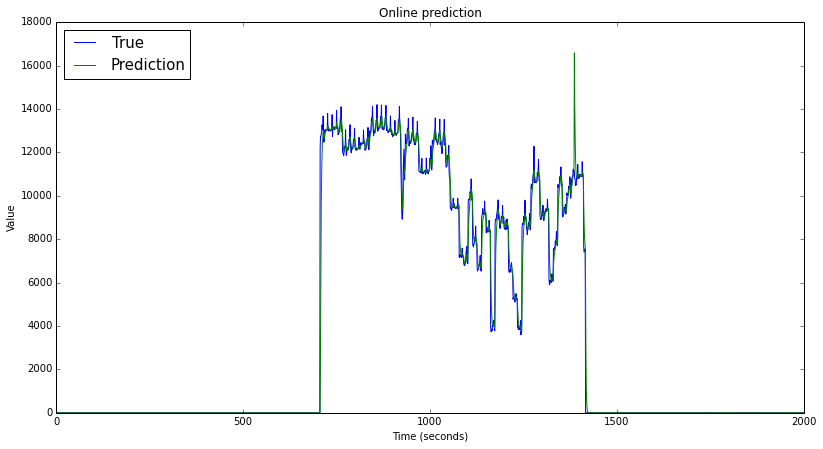

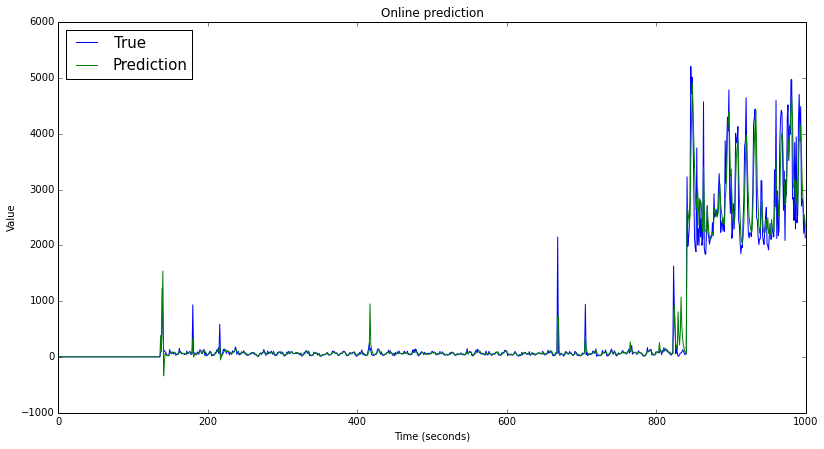

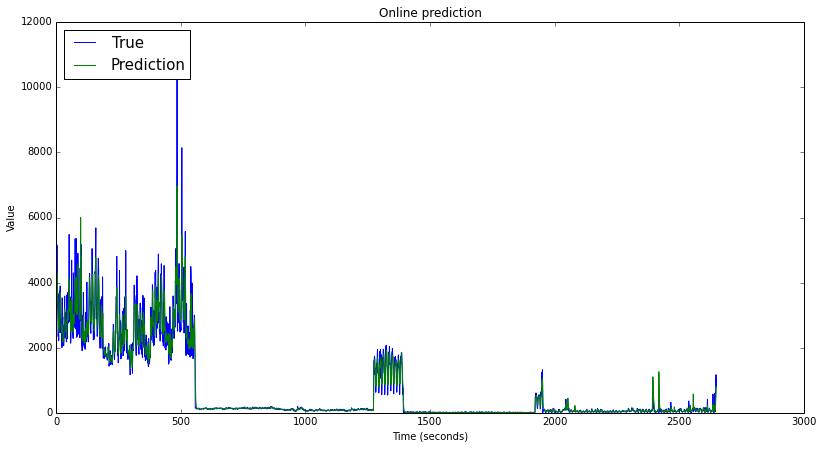

In [103]:
#  yahoo data clean

#  accuracy evaluation: plot

tst_yah_x = testx
tst_yah_y = testy
tst_yah_yh = testyh

fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_yah_y[:2000], label='True')
plt.plot(tst_yah_yh[:2000], label='Prediction')
plt.legend( loc='upper left',fontsize=15 )

# axes = plt.gca()
# axes.set_xlim([1, tdf.shape[0]+10])
# axes.set_ylim([-1000,1000])

#  error calculation


fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_yah_y[2000:3000], label='True')
plt.plot(tst_yah_yh[2000:3000], label='Prediction')
plt.legend( loc='upper left',fontsize=15 )


fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_yah_y[3000:-1], label='True')
plt.plot(tst_yah_yh[3000:-1], label='Prediction')
plt.legend( loc='upper left',fontsize=15 )


cnt= len(testy)
print cnt
nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) for i in range(cnt)])*1.0/cnt)
print 'Normalzied MSE:', nmse


5662
Normalzied MSE: 739.958901304


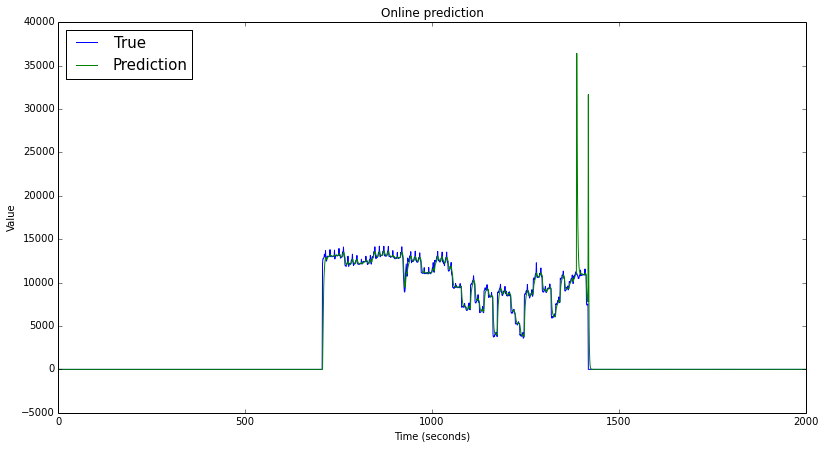

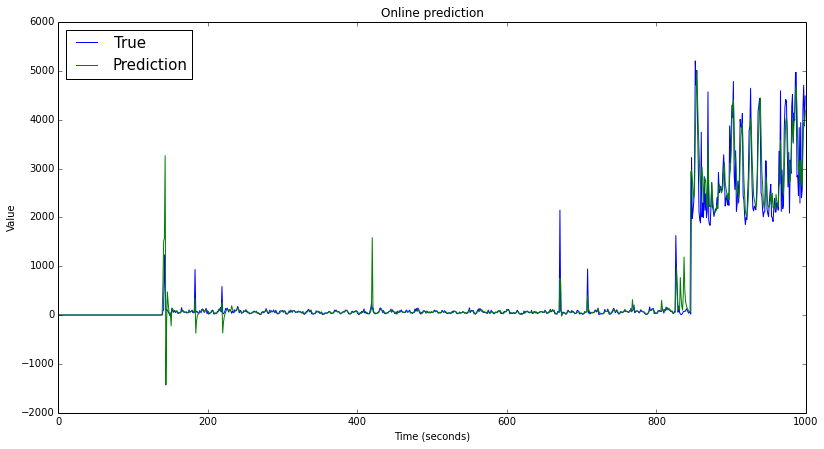

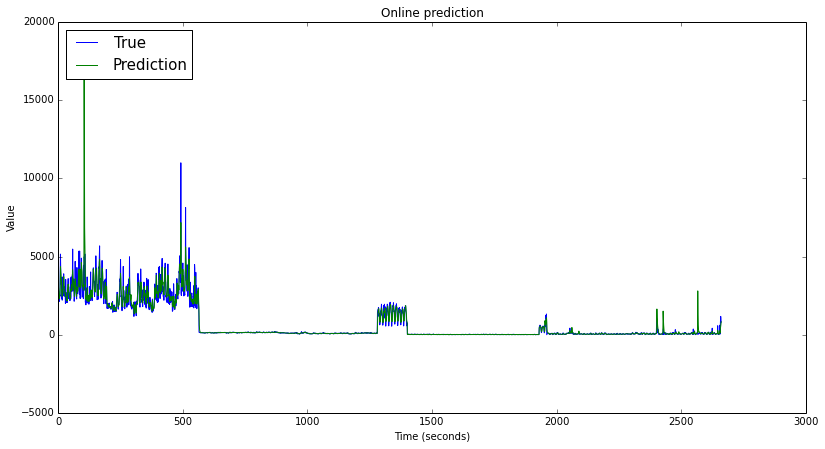

In [107]:
#  yahoo data noisy

#  accuracy evaluation: plot

tst_yah_x = testx
tst_yah_y = testy
tst_yah_yh = testyh

fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_yah_y[:2000], label='True')
plt.plot(tst_yah_yh[:2000], label='Prediction')
plt.legend( loc='upper left',fontsize=15 )

# axes = plt.gca()
# axes.set_xlim([1, tdf.shape[0]+10])
# axes.set_ylim([-1000,1000])

#  error calculation


fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_yah_y[2000:3000], label='True')
plt.plot(tst_yah_yh[2000:3000], label='Prediction')
plt.legend( loc='upper left',fontsize=15 )


fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_yah_y[3000:-1], label='True')
plt.plot(tst_yah_yh[3000:-1], label='Prediction')
plt.legend( loc='upper left',fontsize=15 )


cnt= len(testy)
print cnt
nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) for i in range(cnt)])*1.0/cnt)
print 'Normalzied MSE:', nmse


Normalzied MSE: 7850.67202095


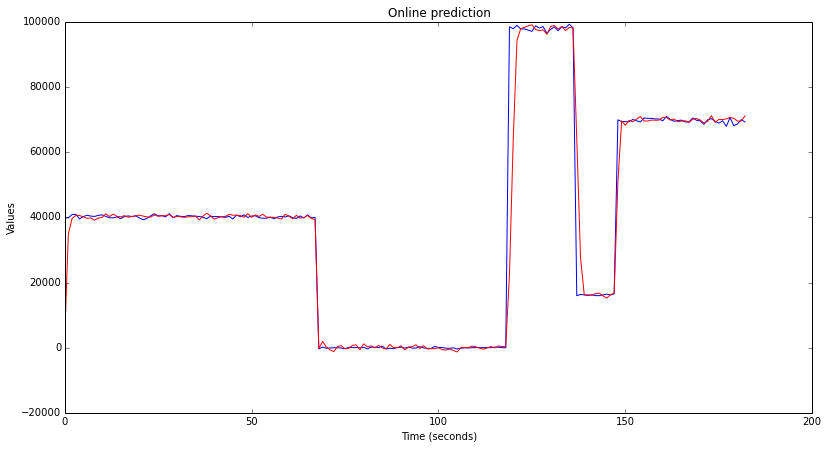

In [121]:
#  uni-variate synthetic time series

#  lr = 7, mean_min=1  mean_max= 100000 
#  accuracy evaluation: plot

tst_ts_x = testx
tst_ts_y = testy
tst_ts_yh = testyh


fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_ts_y, color = 'blue')
plt.plot(tst_ts_yh, color='red')

#  error calculation

cnt= len(testy)

nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) for i in range(cnt)])*1.0/cnt)
print 'Normalzied MSE:', nmse


Normalzied MSE: 64.2571743342


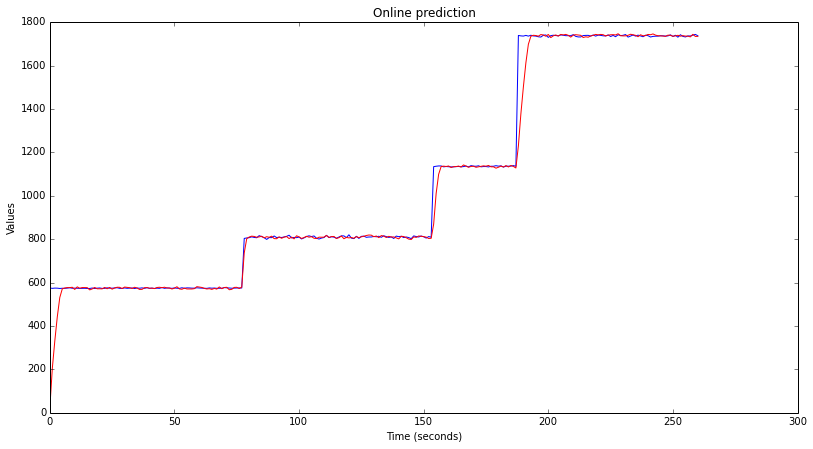

In [77]:
#  uni-variate synthetic time series

#  lr =0.08
#  accuracy evaluation: plot

tst_ts_x = testx
tst_ts_y = testy
tst_ts_yh = testyh


fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_ts_y, color = 'blue')
plt.plot(tst_ts_yh, color='red')

#  error calculation

cnt= len(testy)

nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) for i in range(cnt)])*1.0/cnt)
print 'Normalzied MSE:', nmse


Normalzied MSE: 86.7191609263


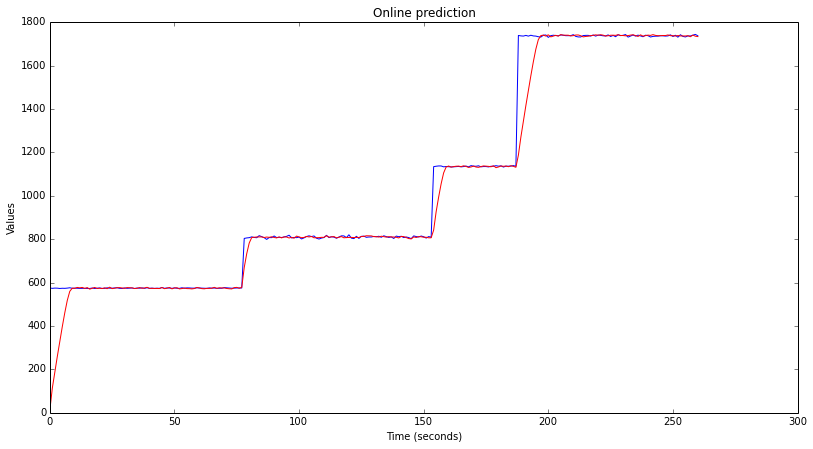

In [75]:
#  uni-variate synthetic time series

#  lr =0.04
#  accuracy evaluation: plot

tst_ts_x = testx
tst_ts_y = testy
tst_ts_yh = testyh


fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_ts_y, color = 'blue')
plt.plot(tst_ts_yh, color='red')

#  error calculation

cnt= len(testy)

nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) for i in range(cnt)])*1.0/cnt)
print 'Normalzied MSE:', nmse


Normalzied MSE: 10.6533957326


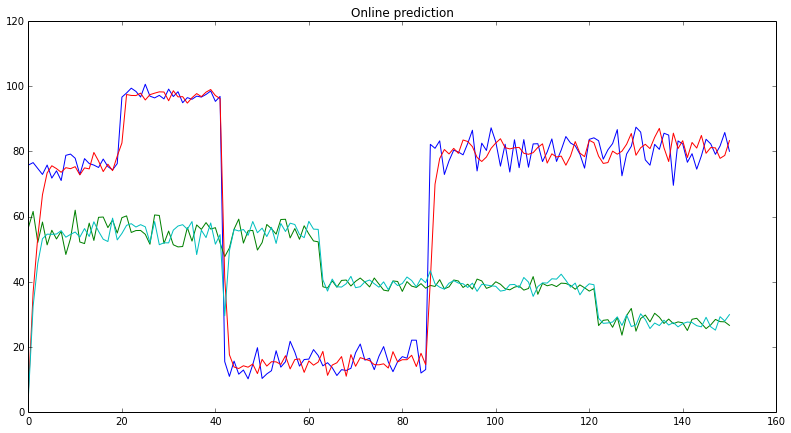

In [57]:
#  multi-variate synthetic time series

#  accuracy evaluation: plot
tst_mts_x = testx
tst_mts_y = testy
tst_mts_yh = testyh

fig = plt.figure()
fig.set_size_inches( figure_size )
plt.title('Online prediction')
plt.ylabel('Value')
plt.xlabel('Time (seconds)')

plt.plot(tst_mts_y)
plt.plot(tst_mts_yh)

#  error calculation
cnt= len(testy)

nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) for i in range(cnt)])*1.0/cnt)
print 'Normalzied MSE:', nmse


In [68]:
#  block4: Bayesian change point detection based on real-time learning of rnn

significance_level = 0.05

cur_seg_stPos=0
cur_seg_cnt=0
ini_run_len=100


#  residual statistics
resi_mean=0.0
resi_sqr = 0.0
resi_var=0.0

# parameter about the hazard function
hconst = 0.3
hrange= seg_len_max
hpiece_num=50
hpiece =[]
hpiece_event=[]
hpiece_psum=[]


# detected change-points
detect_cp_list=[]

# data instances for training RNN
xtrain= dtax
ytrain= dtay
total_len=len(xtrain) 
print xtrain.shape, ytrain.shape


# initialize the network structure
in_dim = 1
hidden_neurons = 800
timesteps =1
in_out_neurons = 2


cp_model = Sequential()
cp_model.add(LSTM(hidden_neurons, return_sequences=True, stateful= True,\
               batch_input_shape = (1,timesteps,in_out_neurons )   ))
cp_model.add(Dropout(0.25))
cp_model.add(TimeDistributedDense(output_dim=in_out_neurons ) )
cp_model.add(Activation("linear"))
rms = RMSprop(lr=0.04, rho=0.9, epsilon=1e-06)
cp_model.compile(loss="mean_squared_error", optimizer=rms )


# initialize the model
cur_trnx= xtrain[:,0:1,:]
cur_trny= ytrain[:,0:1,:]
cp_model.train_on_batch(cur_trnx,cur_trny) 



# ---------------hazard function component------------
def hazard_bsearch( arr, t):
    
    tmplen=len(arr)
    l= 0
    r= tmplen
    
    while( l< r-1):
        mid= int(l+ (r-l)/2.0)
        tmpval= arr[mid][0]
        
        if tmpval> t:
            r= mid
        else:
            l=mid
    
    if t<= arr[l][0]:
        return l
    elif t>= arr[r][0]:
        return r+1
    else:
        return r
    
def hazard_constant():
    return hconst
    
def hazard_piece_ini():
    tmpinter = hrange*1.0 / hpiece_num
    tmph = 1.0 / hpiece_num
    curh=0.0
    
    for i in range(hpiece_num):
        curh= curh+ tmph
        hpiece.append(  [tmpinter*(i+1), curh ]  )
        
        hpiece_event.append(  [tmpinter*(i+1), 0 ]  )
        hpiece_psum.append(  0  )
            
def hazard_piece_qry( cond_t ):
    tmpidx = hazard_bsearch( hpiece, cond_t)
    return hpiece[tmpidx][1]
    
def hazard_update_event( t):
    tmpidx = hazard_bsearch( hpiece_event, t)
    hpiece_event[tmpidx][1] = hpiece_event[tmpidx][1]+1

def hazard_update_piece():
    
    tmp_psum=[]
    tmp=0.0
    tmpsum=0.0
    for i in range(hpiece_num):
        tmp = tmp+ hpiece_event[i][1]
        tmp_psum.append(tmp)
    
    tmpsum= tmp
    
    for i in range(hpiece_num):
        if (tmpsum- tmp_psum[i]+hpiece_event[i][1])!=0 and hpiece_event[i][1]!=0:
            hpiece[i][1] =  hpiece_event[i][1]*1.0/(tmpsum-tmp_psum[i]+hpiece_event[i][1])
    
def hazard_adjust_piece():
    return 1
    
    

#-------------------run-lenght  joint distribution ---------------------

rlen_dist=[]

def rlen_dist_ini():
    for i in range(seg_len_max):
        rlen_dist.append(0)
    rlen_dist[0]=1

def rlen_update( cur_rlen, pred_prob):
    
    rlen_dist[ cur_rlen ] = rlen_dist[ cur_rlen-1 ]*pred_prob* ( 1.0- hazard_piece_qry( cur_rlen-1 )) 
    
    rlen_dist[ 0 ] = rlen_dist[ cur_rlen-1 ]*pred_prob* ( hazard_piece_qry( cur_rlen-1 )) 

    
def rlen_evidence():
    tmpval=0.0
    for i in range(seg_len_max):
        tmpval =  tmpval + rlen_dist[i]
    return tmpval
    
def rlen_conditional(cur_rlen):
    
    return rlen_dist[cur_rlen]/rlen_evidence()

def rlen_renormal():
    return 1
   
# normalize the run-lenght distribution    
    
# --------------------------------------------------------------------
    
hazard_piece_ini()
# print hpiece

    
# the main process
for i in range(1,400):
    
    
#   current data instance for training the model
    cur_trnx= xtrain[:,i:i+1,:]
    cur_trny= ytrain[:,i:i+1,:]
    
#       use so-far training model to predict first 
    vali_testx=  xtrain[:, i:i+1,:]
    curPred= cp_model.predict_on_batch( vali_testx )
    
#       residual of the current data instance w.r.t. the predicted value
    tmpresi =  curPred[0][0][0][0] - ytrain[0, i, 0]
    
    
    if i - cur_seg_stPos <=  ini_run_len:
        
        resi_mean= ( resi_mean * cur_seg_cnt*1.0 + tmpresi)/(cur_seg_cnt+1)
        cur_seg_cnt = cur_seg_cnt+1
        resi_sqr = resi_sqr + tmpresi*tmpresi
        resi_var= resi_sqr/cur_seg_cnt - resi_mean* resi_mean 
        
#         if i - cur_seg_stPos>= ini_run_len-10:
#             resi_mean= ( resi_mean * cur_seg_cnt*1.0 + tmpresi)/(cur_seg_cnt+1)
#             cur_seg_cnt = cur_seg_cnt+1
#             resi_sqr = resi_sqr + tmpresi*tmpresi
#             resi_var= resi_sqr/cur_seg_cnt - resi_mean* resi_mean         
        
        
#       update the model for the current segment
        cp_model.train_on_batch(cur_trnx, cur_trny)
    
        print "initial phase:", tmpresi, resi_mean,resi_var
#         curPred[0][0][0][0],ytrain[0, i, 0]

        continue
        
#       z-value
    resi_mean=0.0
    tmp_zval = (tmpresi -  resi_mean)*1.0 / 1.0*sqrt(resi_var/cur_seg_cnt)
    tmp_pro =  st.norm.cdf( tmp_zval)
        
    print "at time step:",cur_seg_cnt,":", curPred[0][0][0][0], ytrain[0, i, 0], resi_mean,resi_var,tmp_pro
#     curPred, ytrain[:, i:i+1,:], tmp_zval   
    
    
#---------------test component------------------------


    resi_mean= ( resi_mean * cur_seg_cnt*1.0 + tmpresi)/(cur_seg_cnt+1)
    cur_seg_cnt = cur_seg_cnt+1
    resi_sqr = resi_sqr + tmpresi*tmpresi
    resi_var= resi_sqr/cur_seg_cnt - resi_mean* resi_mean             
        
    cp_model.train_on_batch(cur_trnx, cur_trny) 
    
    
#------------------------------------------------------    
        
#     if tmp_pro <= significance_level or tmp_pro >= 1.0-significance_level:
# #       initialize a new segment 
#         cur_seg_stPos =i
#         cur_seg_cnt = 1
            
#         resi_mean= x[i]
#         resi_sqr = x[i]*x[i]*1.0
#         resi_var =  0.0
            
#         detect_cp_list.append(i)

#         reset weights
#         cp_model.reset_states()

#         cp_model.clear_previous(reset_weights=True)
        
# #       initialize a model for the new segment
#         cp_model.train_on_batch(cur_trnx,cur_trny) 
    
# #       update the hazard component
#         hazard_update_event(  i - cur_seg_stPos )
            
#     else:
        
# #      stay in the current segment and update the residual statistics 
#         resi_mean= ( resi_mean * cur_seg_cnt*1.0 + tmpresi)/cur_seg_cnt
#         cur_seg_cnt = cur_seg_cnt+1
#         resi_sqr = resi_sqr + tmpresi*tmpresi
#         resi_var= resi_sqr/cur_seg_cnt - resi_mean* resi_mean             
        
# #       update the model for the current segment
#         cp_model.train_on_batch(cur_trnx, cur_trny) 
    
            
            


(1, 1199, 1) (1, 1199, 1)
initial phase: -76.7947938353 -76.7947938353 0.0
initial phase: -53.4075701424 -65.1011819888 136.740558016
initial phase: -41.9843688224 -57.3955776 209.913050004
initial phase: -31.5724386969 -50.9397928743 282.46625678
initial phase: -27.6329274402 -46.2784197874 312.886601642
initial phase: -16.2994517972 -41.2819251224 385.56362939
initial phase: -13.4446427229 -37.3051704939 425.370575158
initial phase: -13.6869056117 -34.3528873836 433.211082206
initial phase: -9.93739862192 -31.640055299 443.952180871
initial phase: 3.3546980001 -28.1405799691 509.773911046
initial phase: -0.556618743818 -25.6329471304 526.313052759
initial phase: -5.1331661923 -23.9246320522 514.555376165
initial phase: -8.96691181512 -22.7740381879 490.860588273
initial phase: -1.30015601468 -21.2401894612 486.384112593
initial phase: 5.80054614165 -19.4374737543 499.455479964
initial phase: 3.60899710138 -17.9970693259 499.36098623
initial phase: -6.69499840672 -17.3322416247 477.05

In [15]:
# block3: parameter selection for real-time rnn training on keras
from keras.models import Sequential 
from keras.layers.core import Dense, Activation, TimeDistributedDense 
from keras.layers.recurrent import LSTM

# parameters
timesteps =1 
input_dim=1
in_out_neurons = 1 
hidden_neurons = 10000
trn_size= 2 
# dtax.shape[1]-10
trnx = dtax 
trny = dtay 

print trnx.shape, trny.shape


for num in range(3500,4000,200):
    
    print 'number of hidden neurons:', num

    
    rl_model = Sequential()
    rl_model.add(LSTM( num, return_sequences=True, stateful= True,\
                  batch_input_shape = (1,timesteps,input_dim ) ))
    rl_model.add(TimeDistributedDense(output_dim=1 ) )
    rl_model.add(Activation("linear")) 
    rl_model.compile(loss="mean_squared_error", optimizer="rmsprop")
    
    for i in range(trn_size):
        cur_trnx= trnx[:,i:i+1,:] 
        cur_trny= trny[:,i:i+1,:]
    
        print '     data instance:', i, 'of size:', cur_trnx.shape, cur_trny.shape

        rl_model.train_on_batch(cur_trnx,cur_trny) 

#     if i%50 ==0:
#         vali_testx=  trnx[:, i+1:i+2,:]
#         print "at time step:",i,":", rl_model.predict_on_batch( vali_testx )

#     if i == trn_size-1:
#         vali_testx=  trnx[:, i+1:i+2,:]
#         print "at time step:",i,":", rl_model.predict_on_batch( vali_testx )
    
        rl_model.fit(cur_trnx, cur_trny, batch_size=1, nb_epoch=10)
#     validation_split=0.05)

#     predicted = model.predict(X_test)
#     rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
#     model.predict( X_test[0:10] )

    
#     and maybe plot it
# pd.DataFrame(predicted).to_csv("predicted.csv")
# pd.DataFrame(y_test).to_csv("test_data.csv")

(1, 799, 1) (1, 799, 1)
number of hidden neurons: 3500
     data instance: 0 of size: (1, 1, 1) (1, 1, 1)
Epoch 1/10
1/1 [==============================] - 1s - loss: 466818.3750
Epoch 2/10
1/1 [==============================] - 1s - loss: 461521.3750
Epoch 3/10
1/1 [==============================] - 1s - loss: 458589.4375
Epoch 4/10
1/1 [==============================] - 1s - loss: 456356.2500
Epoch 5/10
1/1 [==============================] - 1s - loss: 454472.1562
Epoch 6/10
1/1 [==============================] - 1s - loss: 452797.9062
Epoch 7/10
1/1 [==============================] - 1s - loss: 451244.1250
Epoch 8/10
1/1 [==============================] - 1s - loss: 449809.9375
Epoch 9/10
1/1 [==============================] - 1s - loss: 448446.7812
Epoch 10/10
1/1 [==============================] - 1s - loss: 447134.6562
     data instance: 1 of size: (1, 1, 1) (1, 1, 1)
Epoch 1/10
1/1 [==============================] - 1s - loss: 446011.2812
Epoch 2/10
1/1 [=======================

KeyboardInterrupt: 

In [78]:
# block hazard comopnent test

# parameter about the hazard function
# hconst = 0.3
# hpiece_num=50

# hrange= seg_len_max
# hpiece =[]
# hpiece_event=[]
# hpiece_psum=[]


def hazard_bsearch( arr, t):
    
    tmplen=len(arr)
    l= 0
    r= tmplen
    
    while( l< r-1):
        mid= int(l+ (r-l)/2.0)
        tmpval= arr[mid][0]
        
        if tmpval> t:
            r= mid
        else:
            l=mid
    
    if t<= arr[l][0]:
        return l
    elif t>= arr[r][0]:
        return r+1
    else:
        return r
    
def hazard_constant():
    return hconst
    
def hazard_piece_ini():
    tmpinter = hrange*1.0 / hpiece_num
    tmph = 1.0 / hpiece_num
    curh=0.0
    
    for i in range(hpiece_num):
        curh= curh+ tmph
        hpiece.append(  [tmpinter*(i+1), curh ]  )
        
        hpiece_event.append(  [tmpinter*(i+1), 0 ]  )
        hpiece_psum.append(  0  )
            
def hazard_piece_qry( cond_t ):
    tmpidx = hazard_bsearch( hpiece, cond_t)
    return hpiece[tmpidx][1]
    
def hazard_update_event( t):
    tmpidx = hazard_bsearch( hpiece_event, t)
    hpiece_event[tmpidx][1] = hpiece_event[tmpidx][1]+1

def hazard_update_piece():

#   mechanism for keepting default values
    tmp_psum=[]
    tmp=0.0
    tmpsum=0.0
    for i in range(hpiece_num):
        tmp = tmp+ hpiece_event[i][1]
        tmp_psum.append(tmp)
    
    tmpsum= tmp
    
    for i in range(hpiece_num):
        hpiece[i][1] =  hpiece_event[i][1]*1.0/(tmpsum- tmp_psum[i]+hpiece_event[i][1])
    
    

    
# ...................test.........................

# print hazard_constant()
# hazard_piece_ini()
# print hpiece
# hazard_piece_qry(201)

# hazard_update_event(4130)    
print hpiece_event
    
hazard_update_piece()

print hpiece

[[200.0, 12], [400.0, 0], [600.0, 5], [800.0, 0], [1000.0, 0], [1200.0, 0], [1400.0, 0], [1600.0, 0], [1800.0, 0], [2000.0, 0], [2200.0, 0], [2400.0, 0], [2600.0, 0], [2800.0, 0], [3000.0, 0], [3200.0, 0], [3400.0, 0], [3600.0, 0], [3800.0, 0], [4000.0, 0], [4200.0, 14], [4400.0, 0], [4600.0, 0], [4800.0, 0], [5000.0, 0], [5200.0, 0], [5400.0, 0], [5600.0, 0], [5800.0, 0], [6000.0, 0], [6200.0, 0], [6400.0, 0], [6600.0, 0], [6800.0, 0], [7000.0, 0], [7200.0, 0], [7400.0, 0], [7600.0, 0], [7800.0, 0], [8000.0, 0], [8200.0, 0], [8400.0, 0], [8600.0, 0], [8800.0, 0], [9000.0, 0], [9200.0, 0], [9400.0, 0], [9600.0, 0], [9800.0, 0], [10000.0, 5]]
36.0
[[200.0, 0.3333333333333333], [400.0, 0.0], [600.0, 0.20833333333333334], [800.0, 0.0], [1000.0, 0.0], [1200.0, 0.0], [1400.0, 0.0], [1600.0, 0.0], [1800.0, 0.0], [2000.0, 0.0], [2200.0, 0.0], [2400.0, 0.0], [2600.0, 0.0], [2800.0, 0.0], [3000.0, 0.0], [3200.0, 0.0], [3400.0, 0.0], [3600.0, 0.0], [3800.0, 0.0], [4000.0, 0.0], [4200.0, 0.736842

In [ ]:
#  build online-rnn learning framework


#  state-full lstm 
#  https://github.com/fchollet/keras/blob/master/examples/stateful_lstm.py

# Q&A:
#  stateful lstm
#  variational
#  time steps: maximum time lag?
#  if residula is not white gaussian 

#  septerate modeling on conditions
